# **MACHINE LEARNING PROJECT**

## BY: KANUPRIYA JAIN

# **Airbnb Price Prediction**


![alt text](image2-2.png)

**ABOUT DATASET:**

- Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

- This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

- The data contains 48895 rows and 16 columns.

- The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year.

1. id: Unique ID of the Airbnb listing.
2. name: Name of the listed property.
3. host_id: Unique ID of the host.
4. host_name: Name of the host.
5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. neighbourhood: Specific neighborhood where the property is located.
7. latitude: Latitude coordinate of the property.
8. longitude: Longitude coordinate of the property.
9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. price: Price per night (in USD).
11. minimum_nights: Minimum number of nights guests are required to stay.
12. number_of_reviews: Number of reviews the listing has received.
13. last_review: Date of the last review.
14. reviews_per_month: Average number of reviews per month.
15. calculated_host_listings_count: Total number of properties listed by the host.
16. availability_365: Number of days the property is available in a year.

**AIM:**


*  Our aim will be to predict the price of Airbnb listings based on features like neighborhood, room type, availability, etc. and determine which features are the most important in determining the prices.
*  We will utilize regression algorithms like linear regression,ridge regression,LASSO regression, decision trees, Adaboosting, Xgboosting and neural networks and evaluate the performance of each algorithm and compare their predictions with the actual prices.



# **Importing Libraries and Loading Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import boxcox
import warnings
from sklearn.exceptions import DataConversionWarning
# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
import category_encoders as ce
from xgboost import plot_importance
from sklearn.model_selection import learning_curve
from scipy.stats import randint
from scipy.stats.mstats import winsorize

#For Neural Networks
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [2]:
df=pd.read_csv(r'C:\Users\kanup\Downloads\archive\AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We remove the following columns as the corresponding features are not of interest to us-
- 'id'
- 'host_id'
- 'name'
- 'host_name'
- "last_review"

In [3]:
drop_list = ['id','host_id','name','host_name', "last_review"]
df.drop(drop_list, axis=1, inplace=True)

# **Exploratory Data Analysis**

### **Handling Misssing Values**

In [4]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can observe that there are 10052 missing values in the dataset. To handle these null values in the dataset we will use KNN imputer. KNNImputer is a class from scikit-learn designed to fill or predict missing values in a dataset. The missing values are estimated based on the average of neighboring values. I am taking number of neighbours to be 5 here.

In [5]:
from sklearn.impute import KNNImputer
column_to_impute = df[['reviews_per_month']]
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(column_to_impute)
df['reviews_per_month'] = imputed_data

Now, we can see number of null values in each column is 0.

In [6]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.497775                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.280000                        1.000000   
50%             5.000000           1.220000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

### **Geospatial Visualization**

Since, our dataset contains data about the latitude and longitude, we can visualize the the locations of Airbnb on the map. I am using `folium` library of Python to do this. First, I will make tuples of latitude and longitude and then initialize `folium.Map` object with center as the latitude and longitude of New York City. Then clusters of locations will be added to this map from the dataframe. 

In [6]:
Long=-73.80
Lat=40.80

locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

### **Data Visualization**
 Now, we will explore the dataset to understand how the target attribute (price) depends on each of the features and plot price against different fetures to gain some insights.

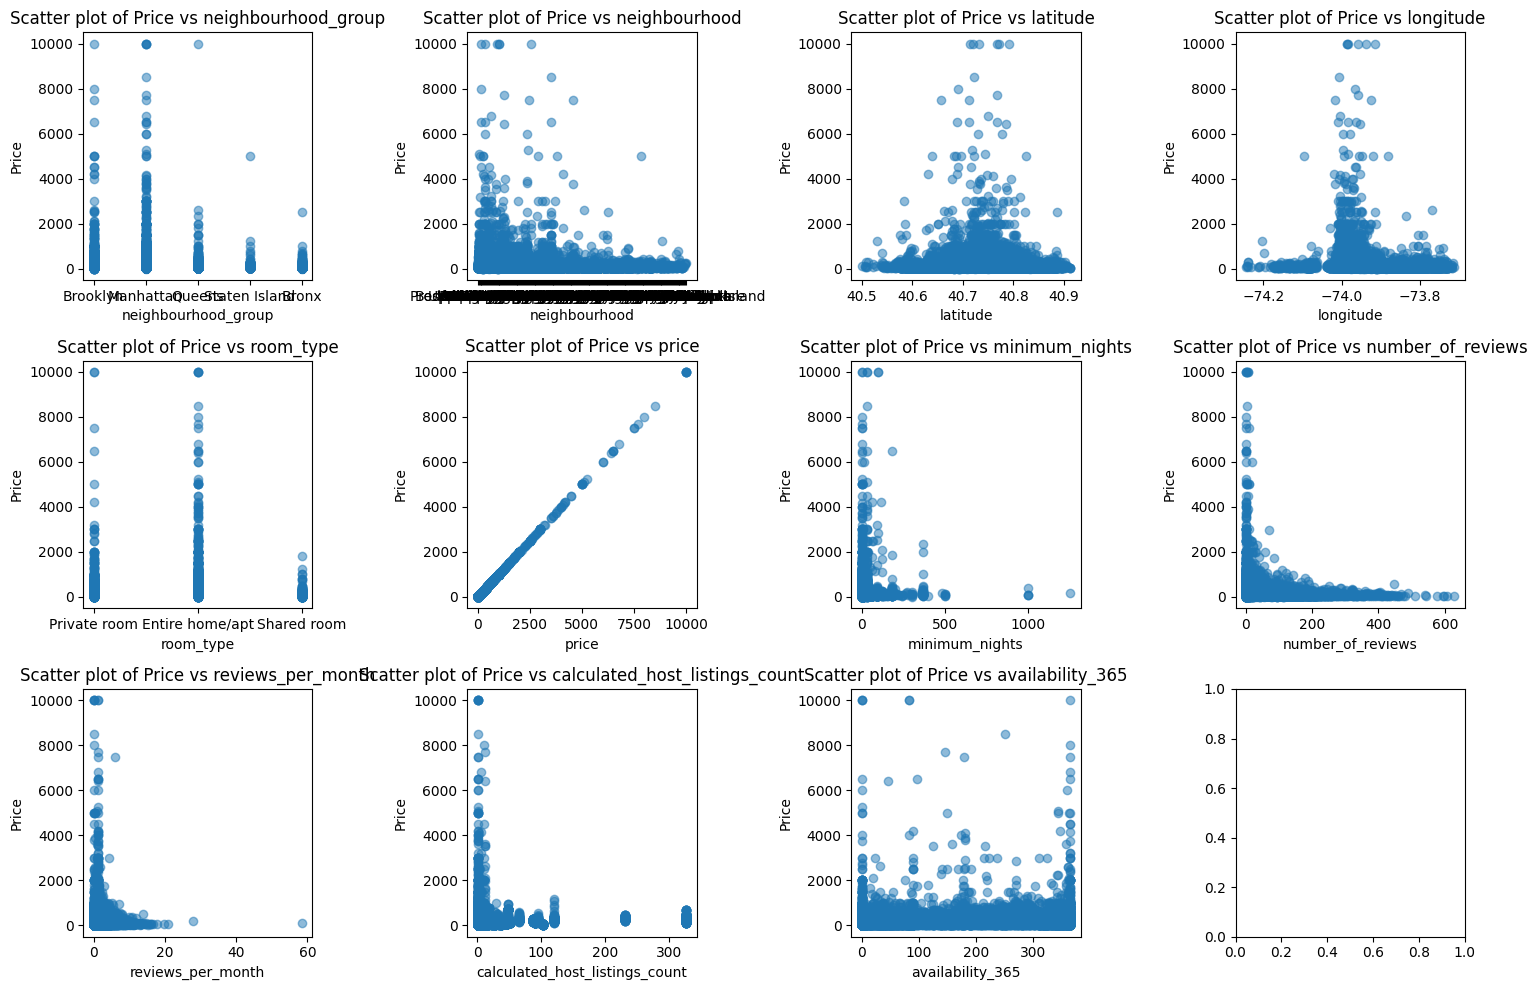

In [ ]:
scatter_features = df.columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(scatter_features):
    ax = axes[idx // 4, idx % 4]  # Get the current axis
    ax.scatter(df[feature], df['price'], alpha=0.5)
    ax.set_title(f'Scatter plot of Price vs {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()


**OBSERVATIONS:**

* We can observe that price of shared room is under 2000 which is much less than the price of Entire room/apt.
* In average, the higher price of room is in Manhattan and Brooklyn. On the other hands, there are a lot of lower price rooms in Queens, Staten Island, and Bronx.
* We can also observe that lower value of minimum_nights prices are higher.
* Listings with lower prices has higher number of reviews and reviews_per_month.  This might be due to the fact that it's common for lower-priced listings to attract more guests because they are more affordable. As a result, these listings may have higher demand and thus higher occupancy rates. Higher occupancy rates can lead to more reviews as more guests stay at the property, which in turn can increase the number of reviews and reviews per month.
* There is an inverse relationship between the number of listings by an individual host and the price of those listings. This might be due to the fact that hosts with multiple listings may have more efficient operations and lower overhead costs per unit. They may have standardized processes for guest communication, check-in/check-out procedures, and maintenance, which can reduce operational costs and enable them to offer lower prices to guests.




Now, we will plot the average price of each room_type in each neighbourhood_group to get a better idea of our dataset.The `sns.barplot()` function will automatically compute the average price for each combination of neighbourhood_group and room_type, and display it as a bar in the plot.

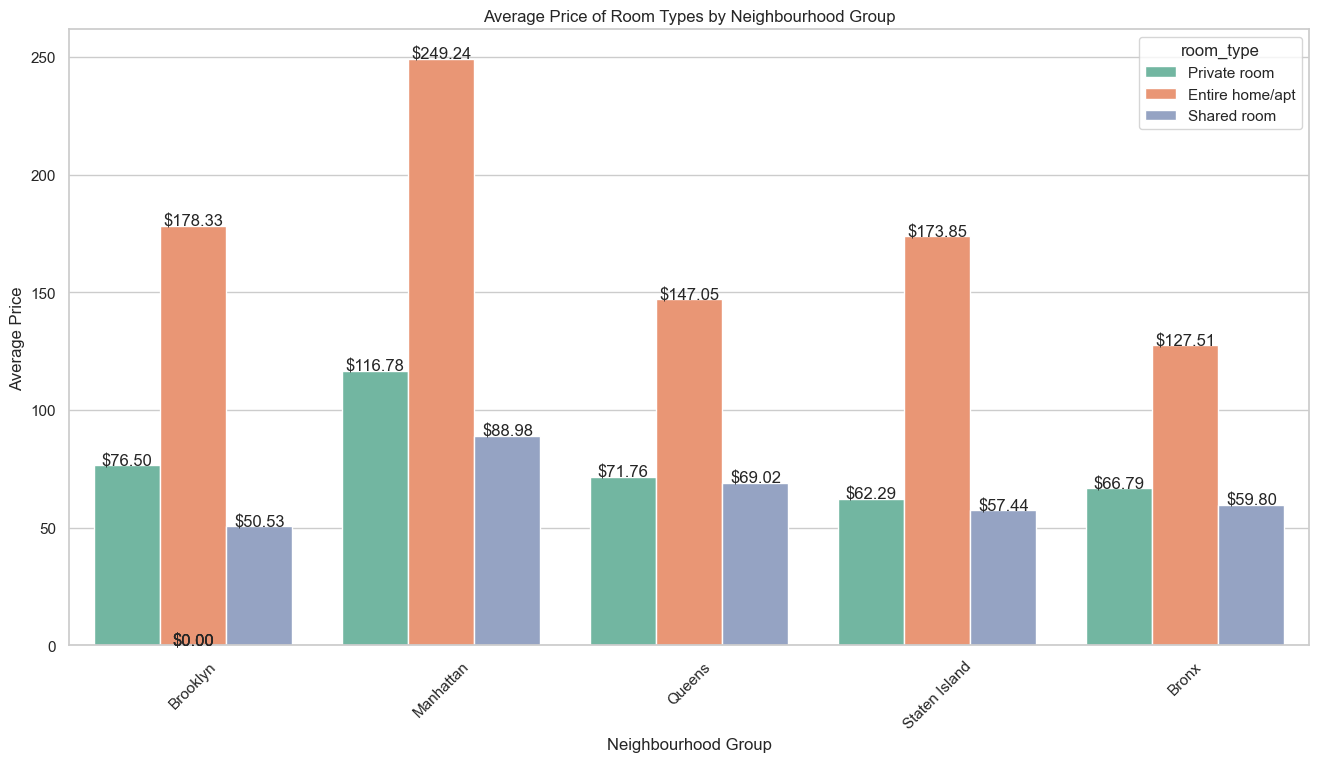

In [7]:

sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', ci=None, palette='Set2')
for p in plt.gca().patches:
    plt.gca().annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline')
plt.xticks(rotation=45)
plt.title('Average Price of Room Types by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

# Show the plot
plt.show()


OBSERVATION:

* We can observe that Manhattan and Brooklyn has the highest average prices for Entire home/apt. 
* In all the five neighbourhood_groups Entire home/apt is the most expensive room_type foolowed by Private room and shared room which is generally the case.
* Manhattan is the most expensive neighbourhood group.

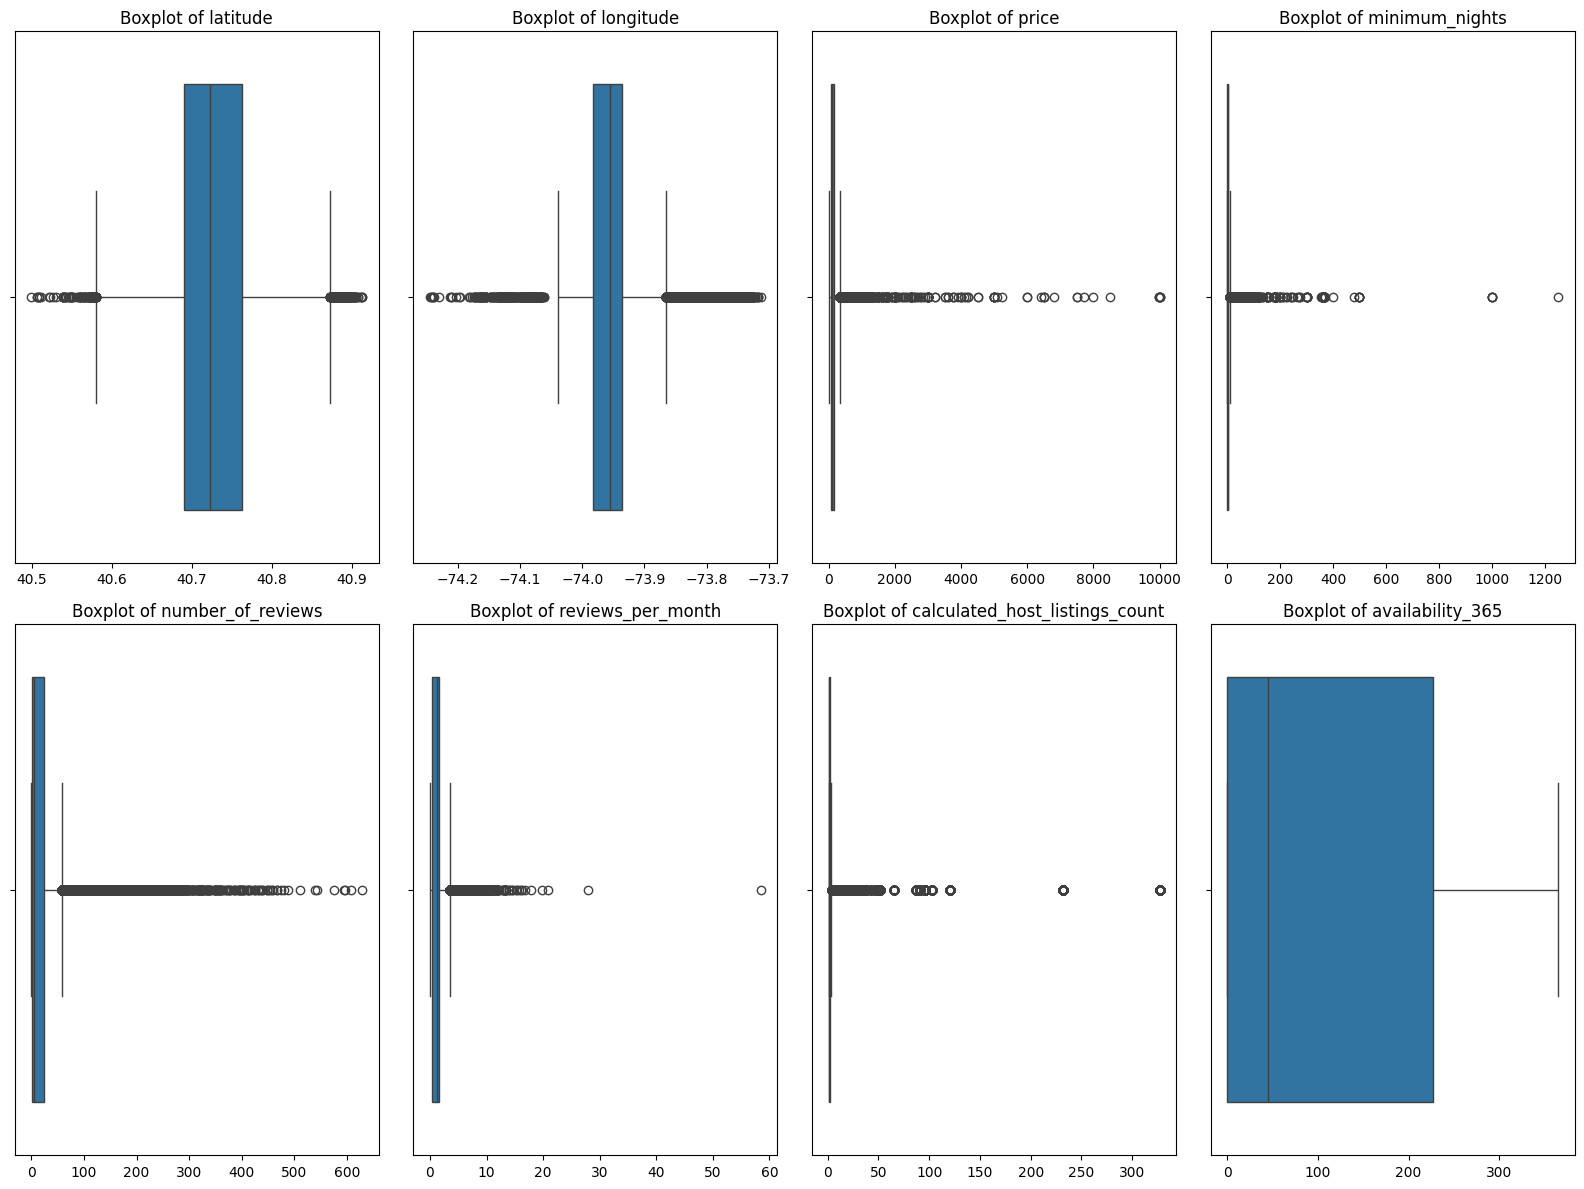

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
num_plots = len(numeric_columns)
num_cols = 4
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()

plt.show()


OBSERVATION:

We can observe that this dataset contains a lot of outliers. We can observe that features like latitude, longitude, minimum_nights, reviews_per_month, calculated_host_listings_count and even our target variable price contains a lot of outliers.

### **Handling Categorical Features**

We have lot of categorical variables. We need to convert them first into numerical data type and then we will proceed further. For this, we will use `MEstimateEncoder`

In [8]:
df.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9           0.210000   
1    225               1                 45           0.380000   
2    150               3                  0           1.373221   
3     89               1                270           4.640000   
4     80              10                  9           0.100000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

We can observe that three categorical variables *'neighbourhood_group'*,
    '*neighbourhood*' and '*room_type*'. So, we will convert these variables into numerical labels. We will do this by `MEstimateEncoder` which will convert categorical features to numerical format. It will compute weighted average of the target variables and it also introduces regulrization parameter which prevents overfitting.

In [7]:
categorical_vars = ['neighbourhood_group','neighbourhood', 'room_type']
encoder = ce.MEstimateEncoder(cols=categorical_vars, m=1.0)
df[categorical_vars] = encoder.fit_transform(df[categorical_vars], df['price'])


In [7]:
df.head()

neighbourhood_group  neighbourhood  latitude  longitude   room_type  price  \
0           124.384617      93.225686  40.64749  -73.97237   89.783792    149   
1           196.873775     282.635007  40.75362  -73.98377  211.791921    225   
2           196.873775     118.986732  40.80902  -73.94190   89.783792    150   
3           124.384617     181.842444  40.68514  -73.95976  211.791921     89   
4           196.873775     133.216208  40.79851  -73.94399  211.791921     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9           0.210000   
1               1                 45           0.380000   
2               3                  0           1.373221   
3               1                270           4.640000   
4              10                  9           0.100000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

Categorical features have now been changed to numerical data.

### **Handling Outliers**

We will use Z-Score Method to check columns which contain outliers in the dataset. The Z-score is a measure that indicates how far a data point is from the mean of the dataset in terms of standard deviations. Z-score can be calculated for each data point and those with a Z-score above a certain threshold (e.g., 2 or 3) can be flagged as potential outliers.

In [8]:
threshold = 2
z_scores = np.abs((df - df.mean()) / df.std())
outliers = z_scores > threshold
for column in df.columns:
    if outliers[column].any():
        print(f"Column '{column}' has outliers.")



Column 'neighbourhood' has outliers.
Column 'latitude' has outliers.
Column 'longitude' has outliers.
Column 'price' has outliers.
Column 'minimum_nights' has outliers.
Column 'number_of_reviews' has outliers.
Column 'reviews_per_month' has outliers.
Column 'calculated_host_listings_count' has outliers.


One common way to handle outliers is to replace them with median. We will first identify outliers using the IQR method and replaces them with the median value of each respective feature. We will use 5% and 95% percentile as the lower and upper threshold.

In [8]:

numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365','neighbourhood_group','neighbourhood', 'room_type']

def replace_outliers_with_median(series):
    median_value = series.median()
    lower_threshold = series.quantile(0.05) - 1.5 * (series.quantile(0.95) - series.quantile(0.05))
    upper_threshold = series.quantile(0.95) + 1.5 * (series.quantile(0.95) - series.quantile(0.95))
    return series.apply(lambda x: median_value if x < lower_threshold or x > upper_threshold else x)

for feature in numerical_features:
    df[feature] = replace_outliers_with_median(df[feature])


**Box-Cox Transformation**

Now, we will apply Box-Cox Transformation to further reduce the effect of outliers. We could have also applied log transformation but our dataset contains negative values of longitude. The equation for Box Cox Tranformation is as follows-
$$y(\lambda) =
\begin{cases}
\frac{{y^\lambda - 1}}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(y) & \text{if } \lambda = 0
\end{cases}$$

We are applying this transformation only to those features which have a lot of outliers.

In [9]:

numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
def apply_boxcox_transform(series):
    const = abs(series.min()) + 1
    transformed_data, lambda_value = boxcox(series + const)
    return transformed_data, lambda_value


for column in numerical_features:
    df[column], lambda_value = apply_boxcox_transform(df[column])

### **Splitting and Normalizing Data**

- We next randomly split the data into train and test sets, before conducting any analysis, as such an analysis will be based on the train set only. This is done using a dedicated scikit-learn function.

- We will split the data into 80% and 20% for training and testing respectively.


In [10]:
fraction_train = 0.8
fraction_test = 1.0 - fraction_train
df_train, df_test = train_test_split(df, train_size = fraction_train, test_size = fraction_test)
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39116 entries, 16614 to 42900
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  float64
 1   neighbourhood                   39116 non-null  float64
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   room_type                       39116 non-null  float64
 5   price                           39116 non-null  float64
 6   minimum_nights                  39116 non-null  float64
 7   number_of_reviews               39116 non-null  float64
 8   reviews_per_month               39116 non-null  float64
 9   calculated_host_listings_count  39116 non-null  float64
 10  availability_365                39116 non-null  float64
dtypes: float64(11)
memory usage: 3.6 MB
<class 'pandas.core.frame.DataFrame'>
Index: 9779 entries,

The sizes of the data entries are on rather different scales. We therefore renormalize the data by rescaling the features, so that all entries are between 0 and 1.

In [11]:
scaler = MinMaxScaler()
df_train[:] = scaler.fit_transform(df_train[:])
y = df_train["price"]
X = df_train.drop(columns=["price"])

df_test[:] = scaler.transform(df_test[:])
y_test = df_test["price"]
X_test = df_test.drop(columns=["price"])


In [12]:
df_test.describe()

neighbourhood_group  neighbourhood     latitude    longitude  \
count          9779.000000    9779.000000  9779.000000  9779.000000   
mean              0.593784       0.418658     0.676354     0.727990   
std               0.368941       0.236051     0.148625     0.092717   
min               0.000000       0.000000    -0.020737     0.034589   
25%               0.336892       0.244789     0.572878     0.660515   
50%               0.336892       0.415421     0.677599     0.739088   
75%               1.000000       0.615088     0.781725     0.779993   
max               1.000000       1.000000     0.999906     1.000174   

         room_type        price  minimum_nights  number_of_reviews  \
count  9779.000000  9779.000000     9779.000000        9779.000000   
mean      0.579424     0.744816        0.406482           0.428222   
std       0.434712     0.114930        0.320272           0.304827   
min       0.000000     0.000000        0.000000           0.000000   
25%       0.138319     0.661543        0.000000           0.183728   
50%       1.000000     0.743109        0.467476           0.445444   
75%       1.000000     0.828331        0.658067           0.674922   
max       1.000000     1.000000        1.000000           1.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        9779.000000                     9779.000000       9779.000000  
mean            0.430252                        0.245458          0.272403  
std             0.268646                        0.389909          0.332706  
min             0.000000                        0.000000          0.000000  
25%             0.170148                        0.000000          0.000000  
50%             0.523034                        0.000000          0.125348  
75%             0.563105                        0.733918          0.501393  
max             1.000000                        1.000000          1.000000

We use the rescaling of the train data. It is therefore possible that some features in the test do not span all the values between 0 and 1 (for instance, the minimum can be below 0; or the maximum below 1).

### **Correlation Matrix**

We now estimate more quantitatively the level of linear dependence between the features and the target variable.

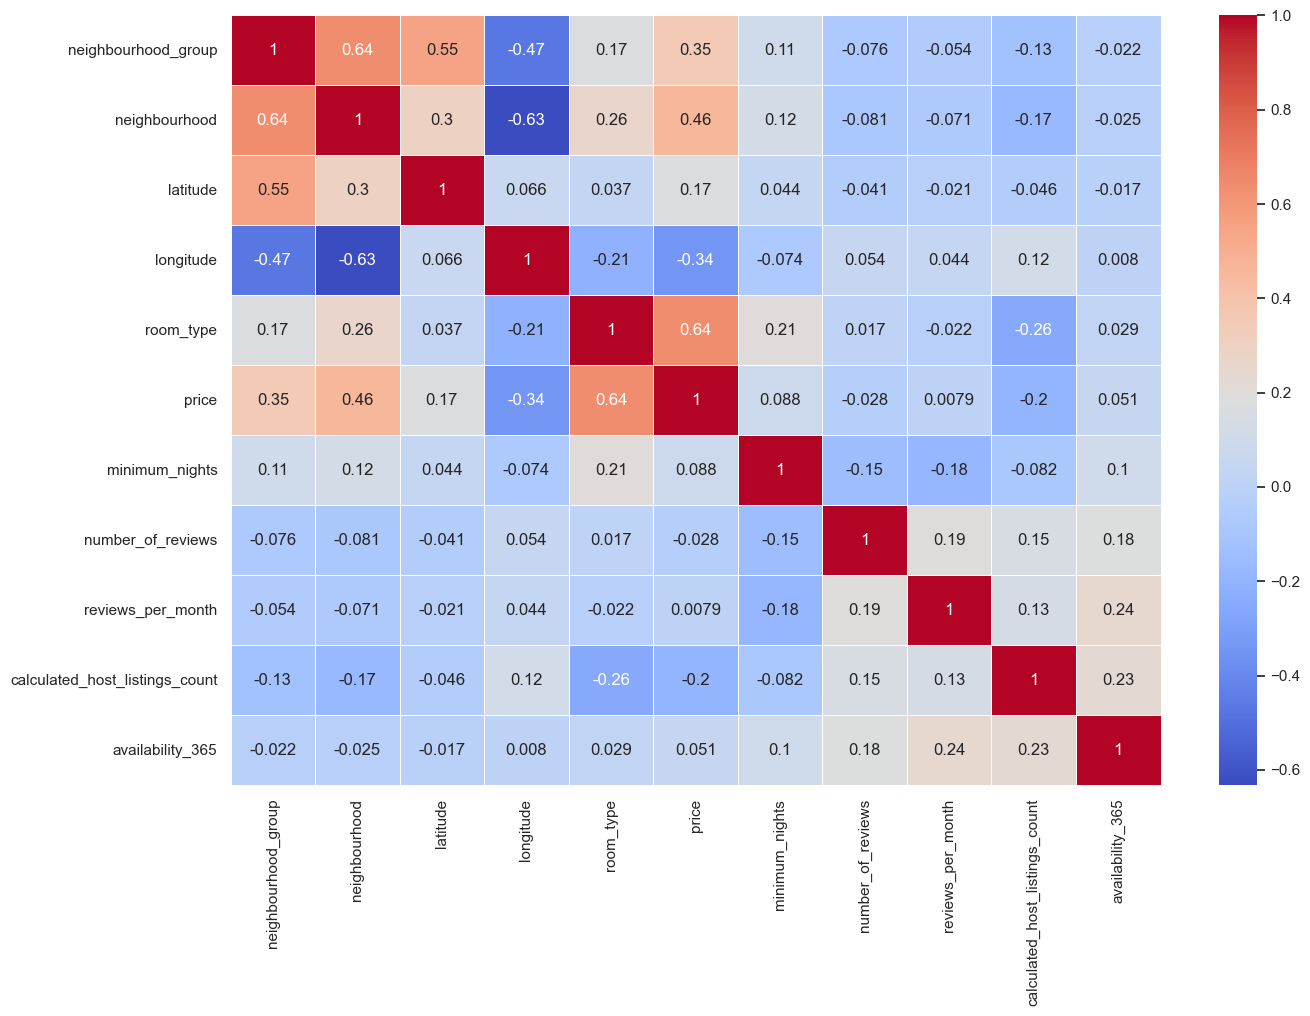

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(method='pearson'), annot = True, linewidths=.5, cmap="coolwarm")
plt.show()

In [13]:
df_train.corrwith(df_train['price'], axis=0, method='pearson')

neighbourhood_group               0.349221
neighbourhood                     0.461590
latitude                          0.168035
longitude                        -0.345333
room_type                         0.642968
price                             1.000000
minimum_nights                    0.092257
number_of_reviews                -0.030558
reviews_per_month                 0.000351
calculated_host_listings_count   -0.199509
availability_365                  0.043433
dtype: float64

**Observation**: We can observe 'that room_type' has the strongest correlation with price followed by 'neighbourhood'. Another important factor in determining price is location i.e. 'longitude' in this case. Other features shows weak correlation with the price. We will do feature importance for each case to check which features are most important in determing the prices.

Now, we will implement different models to predict the prices. We will also measure execution time in each case.

# **Linear Regression**

### **Plain training of a linear model**

In [17]:
start_time=time.time()

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X, y)
predictions_lr = linear_regressor.predict(X_test)

exe_time1=time.time()-start_time

mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, predictions_lr)
print('\nCoefficients and their weights:')
for pair in zip(X.columns, linear_regressor.coef_):
  print(pair[0],' -> ',"{:.3f}".format(pair[1]))
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared Score:", r2_lr)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions_lr))
print("Time taken :", exe_time1)


Coefficients and their weights:
neighbourhood_group  ->  0.017
neighbourhood  ->  0.110
latitude  ->  0.043
longitude  ->  -0.069
room_type  ->  0.149
minimum_nights  ->  -0.028
number_of_reviews  ->  -0.013
reviews_per_month  ->  0.009
calculated_host_listings_count  ->  -0.002
availability_365  ->  0.018
Mean Squared Error: 0.006162311026948809
Root Mean Squared Error: 0.07850038870571795
R-squared Score: 0.5246878672769313
Mean Absolute Error: 0.06147365663827182
Time taken : 0.18741679191589355


**Feature Importance**

I will create a horizontal bar plot to visualize the feature importance (coefficients) of a linear regression model. The length of each bar represents the magnitude and direction (positive or negative) of the coefficient for each feature. Features with bars extending to the right have a positive impact on the target variable, while those extending to the left have a negative impact. Coefficients with high absolute value have higher importance.

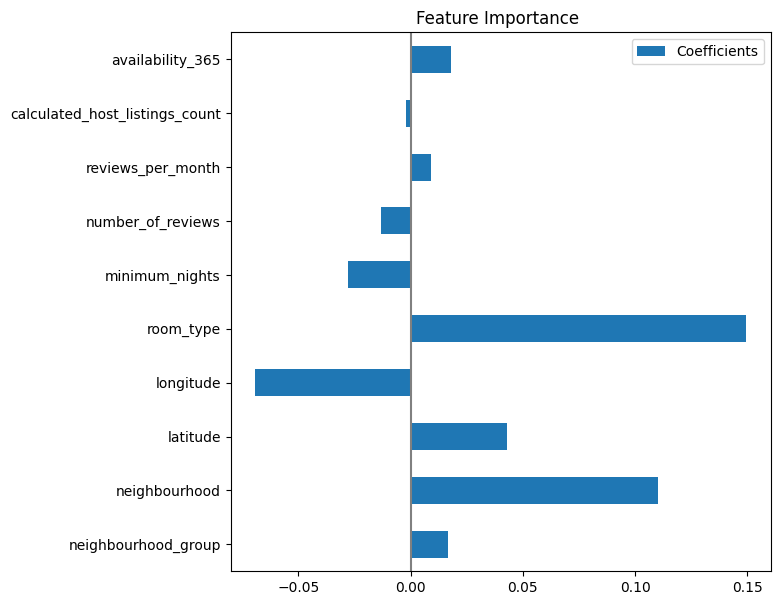

In [18]:
coefs = pd.DataFrame(
    linear_regressor.coef_, columns=["Coefficients"], index=X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature Importance ")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We can observe that room_type,neighbourhood and longitude are the top three features in determing the prices in plain linear regression.

## **Training with some regularization**

#### **Hyperparameter Tuning**

We will now investigate the impact of the regularization coefficient on the results in a structured manner. Our goal is to determine the optimal value of regularization parameter for prediction using the test set. Before proceeding with this analysis, we examine how the regression coefficients evolve as α increases.

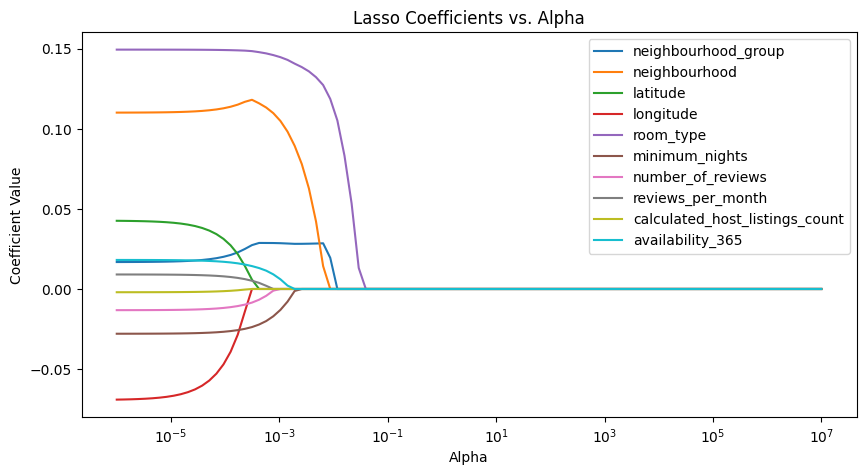

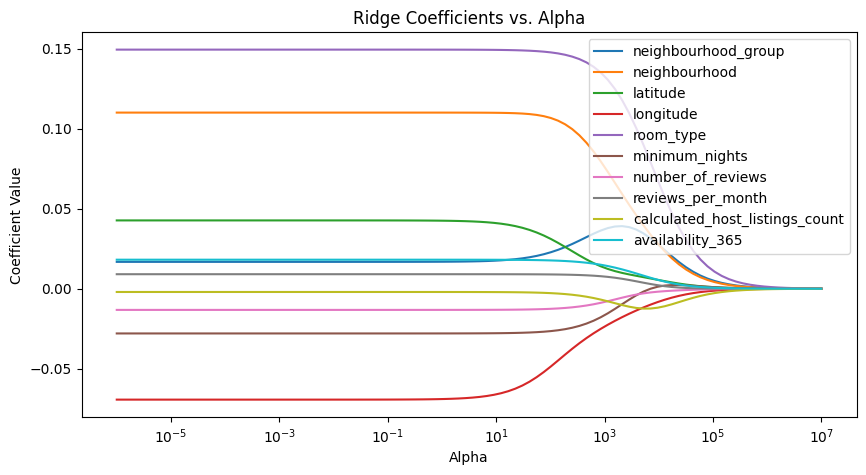

In [19]:
# Create an array of alpha values
alphas =  np.logspace(-6, 7, 100)


# Initialize matrices to store coefficients
coefs_lasso = np.zeros((len(alphas), X.shape[1]))
coefs_ridge = np.zeros((len(alphas), X.shape[1]))

# Train Lasso and Ridge regression models for each alpha value
for i, alpha in enumerate(alphas):
    # Train Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs_lasso[i] = lasso.coef_

    # Train Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs_ridge[i] = ridge.coef_

# Plot coefficients versus alpha values for Lasso
plt.figure(figsize=(10, 5))
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_lasso[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs. Alpha')
plt.legend()
plt.show()

# Plot coefficients versus alpha values for Ridge
plt.figure(figsize=(10, 5))
for i in range(X.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs. Alpha')
plt.legend()
plt.show()


**OBSERVATIONS:**

* We can observe that coefficients of Ridge become zero after about $10^5$ while coefficients of LASSO after $10^{-1}$ which might because LASSO regression imposes a penalty on the L1-norm of the coefficients. This penalty has the effect of encouraging sparse solutions where many coefficients become exactly zero.

* One important observation in both the cases is that in both cases first coefficient that becomes non-zero while decreasing alpha is room_type followed by neighbourhood and neighbourhood_group which suggests the importance of these features in determining rental prices.

* Also, absolute values of coefficient for longitude is very high and it is not that large for latitude. This could be due to the specific geographic distribution of the data or the way coordinates are represented in the dataset.Other coefficients seems to similar average and small absolute value.


We next implement ridge, lasso and elastic net regularization techniques using built-in Scikit-learn functions on a regression model to enhance its generalization performance and mitigate the risk of overfitting.

### **1. Ridge Regression**

In [20]:
alphas_ridge =  np.logspace(-6, 7, 100)
ridge = Ridge()
reg_lr1 = GridSearchCV(ridge, param_grid={'alpha': alphas_ridge}, cv=10, scoring=None, return_train_score=True)

start_time=time.time()
reg_lr1.fit(X, y)
ridge_predictions = reg_lr1.predict(X_test)
exe_time_ridge=time.time()-start_time



ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = ridge_mse ** 0.5
r2_ridge = r2_score(y_test, ridge_predictions)

print("Chosen Alpha:", reg_lr1.best_params_['alpha'])
print("Best Score:", reg_lr1.best_score_)
print('Regularizator score (R2 coefficient):', reg_lr1.score(X, y))

print('Regularizator coefficients:')
[(pair[0], round(pair[1], 4)) for pair in zip(X.columns, reg_lr1.best_estimator_.coef_)]
print("Ridge Model - Mean Squared Error:", ridge_mse)
print("Ridge Model - Root Mean Squared Error:", ridge_rmse)
print("Ridge Model - Mean Absolute Error:", mean_absolute_error(y_test, ridge_predictions))
print("Ridge Model - R-squared (R2) Score:", r2_ridge)
print("Time taken for execution: ",exe_time_ridge)





Chosen Alpha: 2.7185882427329457
Best Score: 0.519836081163933
Regularizator score (R2 coefficient): 0.5201875749566519
Regularizator coefficients:
Ridge Model - Mean Squared Error: 0.006162437881922378
Ridge Model - Root Mean Squared Error: 0.07850119669102107
Ridge Model - Mean Absolute Error: 0.061475972622331385
Ridge Model - R-squared (R2) Score: 0.5246780826834938
Time taken for execution:  39.33100175857544


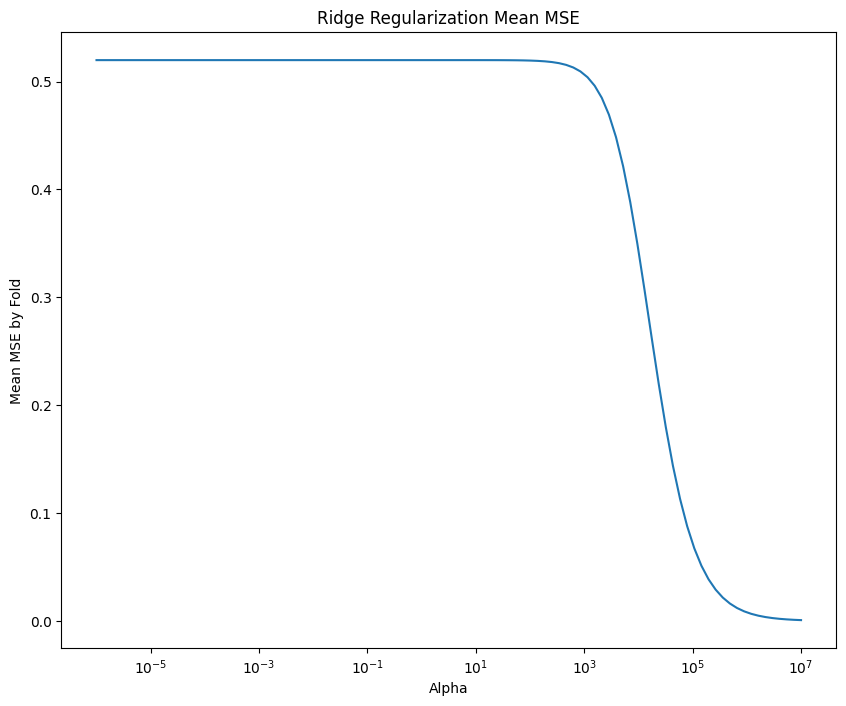

In [21]:
# Extract mean_test_score from cv_results_
mean_test_scores = reg_lr1.cv_results_['mean_test_score']

# Plot Mean MSE by fold for Ridge regularization
plt.figure(figsize=(10, 8))
plt.semilogx(reg_lr1.param_grid['alpha'], mean_test_scores)
plt.xlabel("Alpha")
plt.ylabel("Mean MSE by Fold")
plt.title("Ridge Regularization Mean MSE")
plt.show()


**OBSERVATIONS-**

The plot shows that as the alpha value increases (indicating stronger regularization), the mean MSE remains relatively constant around 0.10 until alpha reaches a value of $10^2$. After this point, there is a noticeable drop in the mean MSE to a value less than 0.02 for alpha values around $10^5$. Beyond this point, the mean MSE remains relatively constant. This behavior suggests that increasing the strength of regularization initially has a minimal effect on reducing MSE, but once alpha reaches a certain threshold, further increasing it leads to significant reductions in MSE. However, after reaching a certain point, additional regularization does not provide further improvements in model performance.

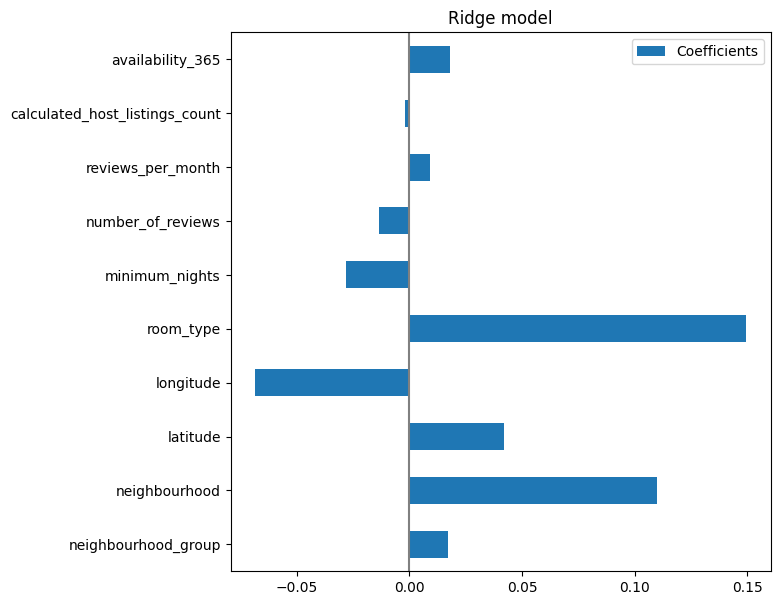

In [22]:
coefs = pd.DataFrame(
    reg_lr1.best_estimator_.coef_, columns=["Coefficients"], index=X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We can observe here the importance of room_type and neighbourhood as suggested by the plots of path of coefficients against alpha. Although, that plot also suggested that neighbourhood_group might be another important factor but here we can observe here that importance of longitude and latitude is above neighbourhood_group.

### **LASSO Regression**

In [23]:

alphas_lasso = np.logspace(-8, 4, 100)
lasso = Lasso()
reg_lr2 = GridSearchCV(lasso, param_grid={'alpha': alphas_lasso}, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

start_time=time.time()
reg_lr2.fit(X, y)
lasso_predictions = reg_lr2.predict(X_test)
exe_time_lasso=time.time()-start_time


lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = lasso_mse ** 0.5
r2_lasso = r2_score(y_test, lasso_predictions)


print("Chosen Alpha:", reg_lr2.best_params_['alpha'])
print("Best Score:", reg_lr2.best_score_)
print('Regularizator coefficients:')
[(pair[0], round(pair[1], 4)) for pair in zip(X.columns, reg_lr2.best_estimator_.coef_)]

print("\nLasso Model - Mean Squared Error:", lasso_mse)
print("Lasso Model - Root Mean Squared Error:", lasso_rmse)
print("Lasso Model - Mean Absolute Error:", mean_absolute_error(y_test, lasso_predictions))
print("Lasso Model - R-squared (R2) Score:", r2_lasso)
print("Time taken for execution :",exe_time_lasso)


Chosen Alpha: 1.232846739442066e-07
Best Score: -0.006148104038240431
Regularizator coefficients:

Lasso Model - Mean Squared Error: 0.006162316478370297
Lasso Model - Root Mean Squared Error: 0.07850042342796819
Lasso Model - Mean Absolute Error: 0.06147373037081467
Lasso Model - R-squared (R2) Score: 0.524687446797218
Time taken for execution : 66.15111255645752


Note that best score is negative because we have chosen `neg_mean_squared_error` as the scoring method here.

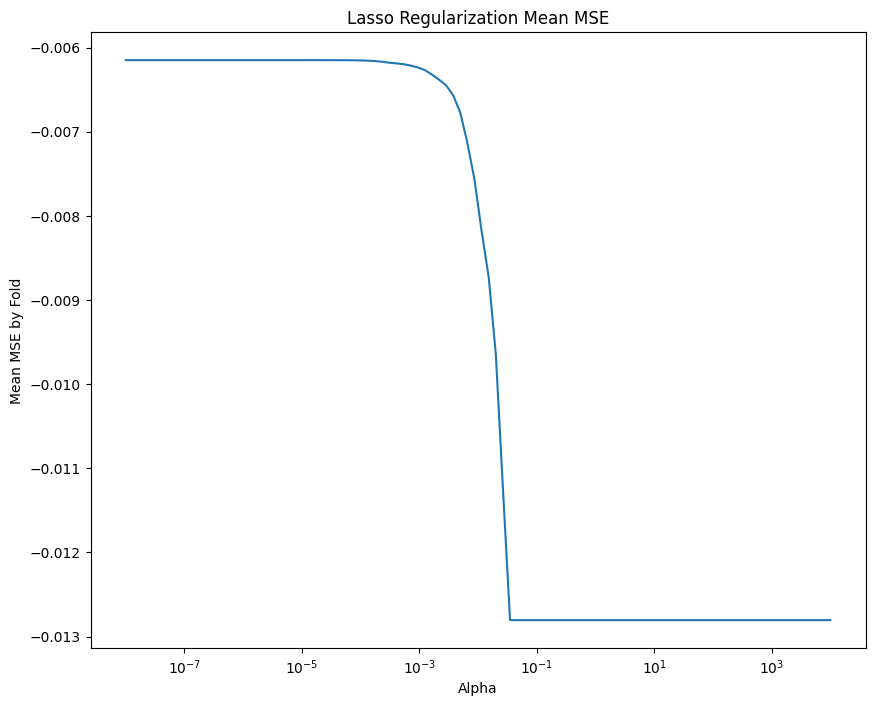

In [24]:

mean_test_scores = reg_lr2.cv_results_['mean_test_score']

plt.figure(figsize=(10, 8))
plt.semilogx(reg_lr2.param_grid['alpha'], mean_test_scores)
plt.xlabel("Alpha")
plt.ylabel("Mean MSE by Fold")
plt.title("Lasso Regularization Mean MSE")
plt.show()


OBSERVATION-

As alpha increases from $10^{-3}$ to $10^{-1}$, there's a sudden drop in MSE, indicating that the regularization starts to have a more pronounced effect. The model begins to generalize better, resulting in lower MSE values.

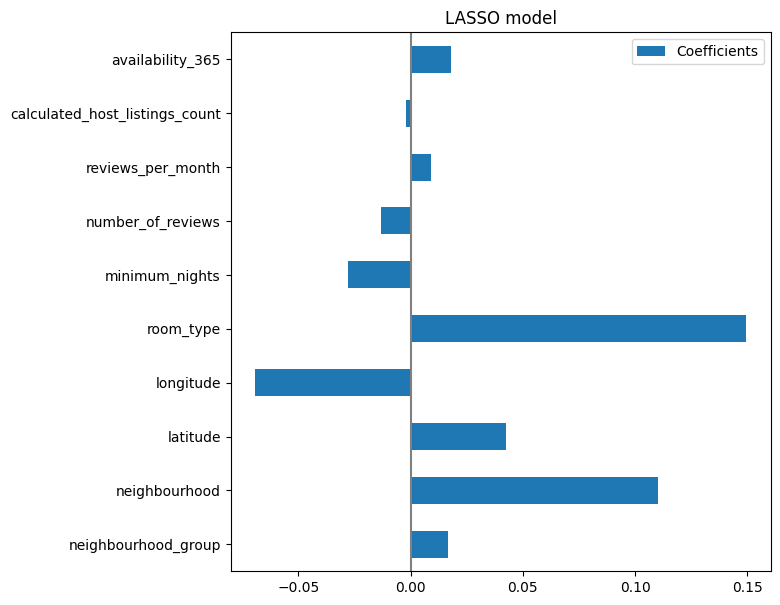

In [25]:
coefs = pd.DataFrame(
    reg_lr2.best_estimator_.coef_, columns=["Coefficients"], index=X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("LASSO model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We can observe the similar importance as in the case of Ridge Model.

### **Elastic Net**

In [26]:

param_grid_elastic_net = {
    'alpha': np.logspace(-6, 4, 100),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}


elastic_net = ElasticNet()
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic_net,
                                       cv=10, scoring='neg_mean_squared_error',
                                       return_train_score=True)

start_time=time.time()
grid_search_elastic_net.fit(X, y)
predictions_elastic_net = grid_search_elastic_net.predict(X_test)
exe_time_elastic_net=time.time()-start_time


mse_elastic_net = mean_squared_error(y_test, predictions_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, predictions_elastic_net)
r2_elastic_net = r2_score(y_test, predictions_elastic_net)


print("Chosen Alpha:", grid_search_elastic_net.best_params_['alpha'])
print("Chosen L1 Ratio:", grid_search_elastic_net.best_params_['l1_ratio'])
print("Best Score:", -grid_search_elastic_net.best_score_)
print('Regularizator coefficients:')
[(pair[0], round(pair[1], 4)) for pair in zip(X.columns, grid_search_elastic_net.best_estimator_.coef_)]

print("Elastic Net - Mean Squared Error (MSE):", mse_elastic_net)
print("Elastic Net - Root Mean Squared Error (RMSE):", rmse_elastic_net)
print("Elastic Net - Mean Absolute Error (MAE):", mae_elastic_net)
print("Elastic Net - R-squared (R2) Score:", r2_elastic_net)

print("Time taken for execution:",exe_time_elastic_net)


Chosen Alpha: 1.023531021899027e-05
Chosen L1 Ratio: 0.1
Best Score: 0.0061481031297938825
Regularizator coefficients:
Elastic Net - Mean Squared Error (MSE): 0.006162373027868396
Elastic Net - Root Mean Squared Error (RMSE): 0.078500783613085
Elastic Net - Mean Absolute Error (MAE): 0.06147457684930935
Elastic Net - R-squared (R2) Score: 0.5246830850143693
Time taken for execution: 745.6807150840759


Now, we will plot a heat map which will display MSE over different combinations of alpha and L1 Ratio.

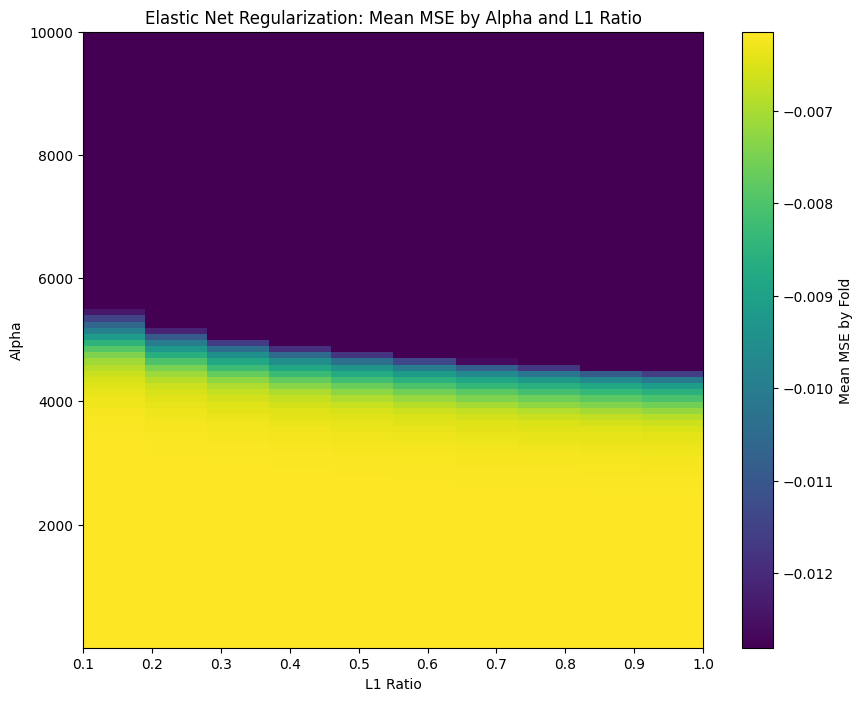

In [27]:

mean_test_scores = grid_search_elastic_net.cv_results_['mean_test_score']
alphas = grid_search_elastic_net.cv_results_['param_alpha']
l1_ratios = grid_search_elastic_net.cv_results_['param_l1_ratio']
mean_test_scores_2d = np.array(mean_test_scores).reshape(len(np.unique(alphas)), len(np.unique(l1_ratios)))
plt.figure(figsize=(10, 8))
plt.imshow(mean_test_scores_2d, extent=[min(l1_ratios), max(l1_ratios), min(alphas), max(alphas)],
           aspect='auto', origin='lower')
plt.colorbar(label='Mean MSE by Fold')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.title('Elastic Net Regularization: Mean MSE by Alpha and L1 Ratio')
plt.show()


OBSERVATIONS:
- **Low MSE for Low Alpha and L1 Ratio:** We can observe that Mean MSE by fold is lower for low values of both alpha and L1 Ratio (area in yellow).
- **Increasing Alpha Increases Mean MSE:** We can also observe that no matter how much we increase L1 ratio mean MSE is always lower for low values of alpha (again area in yellow). This suggests that higher values of alpha lead to higher mean MSE, indicating poorer model performance.
- **Effect of L1 Ratio on Mean MSE:** As soon as we start increasing alpha (above 4000), mean MSE also starts increasing (area in purple).While there is some variation in mean MSE with changes in the L1 ratio, it seems less pronounced compared to the effect of alpha. The plot shows that no matter how much the L1 ratio is increased, the mean MSE remains lower for low values of alpha.


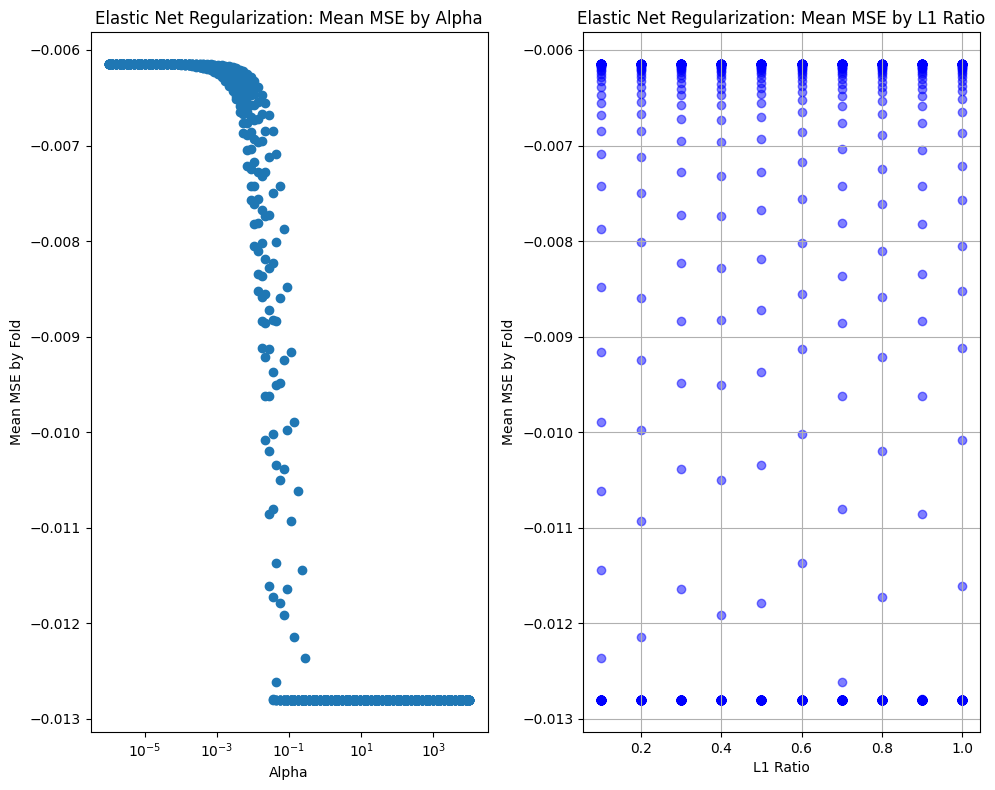

In [28]:

mean_test_scores_alpha = grid_search_elastic_net.cv_results_['mean_test_score']
alphas = grid_search_elastic_net.cv_results_['param_alpha']
mean_test_scores_l1_ratio = grid_search_elastic_net.cv_results_['mean_test_score']
l1_ratios = grid_search_elastic_net.cv_results_['param_l1_ratio']
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].scatter(alphas, mean_test_scores_alpha)
axes[0].set_xscale('log')
axes[0].set_xlabel("Alpha")
axes[0].set_ylabel("Mean MSE by Fold")
axes[0].set_title("Elastic Net Regularization: Mean MSE by Alpha")
axes[1].scatter(l1_ratios, mean_test_scores_l1_ratio, marker='o', color='blue', alpha=0.5)
axes[1].set_xlabel("L1 Ratio")
axes[1].set_ylabel("Mean MSE by Fold")
axes[1].set_title("Elastic Net Regularization: Mean MSE by L1 Ratio")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In grid search cross-validation, multiple combinations of hyperparameters (in this case, alpha and L1 ratio) are evaluated to find the best combination that minimizes the mean squared error (MSE). Therefore, for each unique value of L1 ratio, there could be multiple corresponding mean MSE values, each representing the result of one combination of hyperparameters. Similar thing is hapening for Alpha.

To address this issue and to have a clearer representation in the scatter plot, we will aggregate the mean MSE values for each unique L1 ratio value.We will calculate the average or median of the mean MSE values for each L1 ratio.

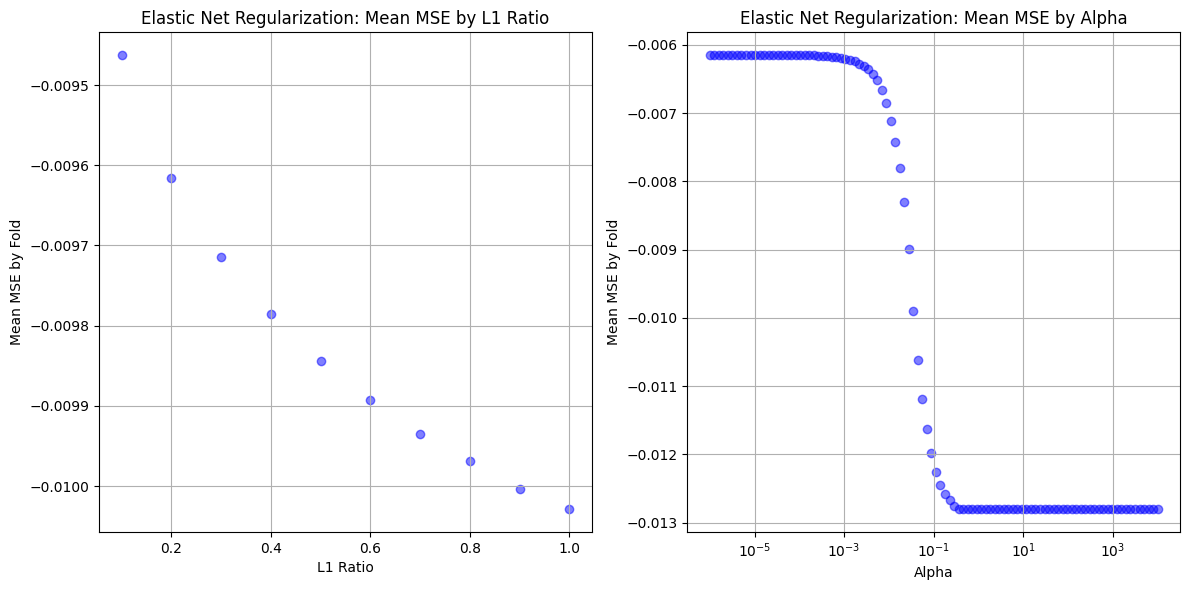

In [29]:

unique_l1_ratios = np.unique(l1_ratios)
aggregated_mean_mse_l1 = [np.mean(mean_test_scores_l1_ratio[l1_ratios == l1_ratio]) for l1_ratio in unique_l1_ratios]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(unique_l1_ratios, aggregated_mean_mse_l1, marker='o', color='blue', alpha=0.5)
plt.xlabel("L1 Ratio")
plt.ylabel("Mean MSE by Fold")
plt.title("Elastic Net Regularization: Mean MSE by L1 Ratio")
plt.grid(True)
unique_alphas = np.unique(alphas)
aggregated_mean_mse_alpha = [np.mean(mean_test_scores_alpha[alphas == alpha]) for alpha in unique_alphas]
plt.subplot(1, 2, 2)
plt.scatter(unique_alphas, aggregated_mean_mse_alpha, marker='o', color='blue', alpha=0.5)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean MSE by Fold")
plt.title("Elastic Net Regularization: Mean MSE by Alpha")
plt.grid(True)

plt.tight_layout()
plt.show()


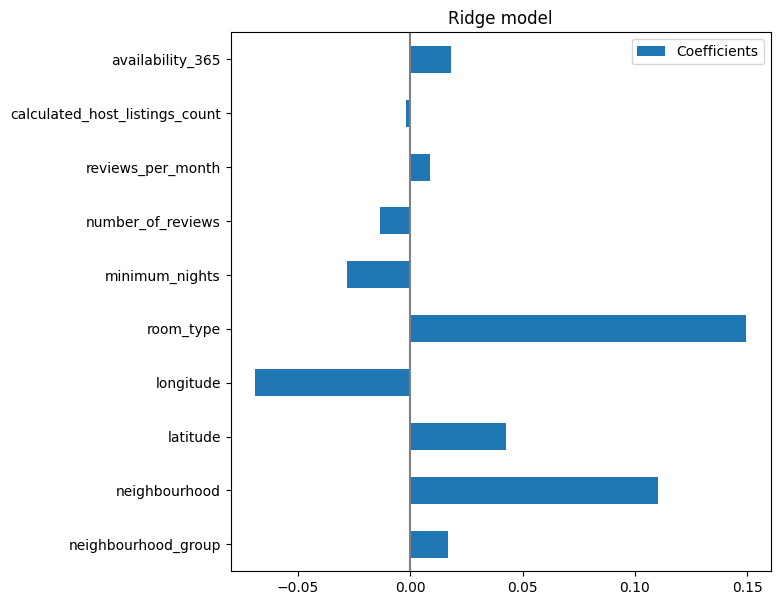

In [30]:
coefs = pd.DataFrame(
    grid_search_elastic_net.best_estimator_.coef_, columns=["Coefficients"], index=X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

We are getting the same results that we were getting with LASSO and Ridge.

# **Decision Trees**

Now, we will work with Regression Trees to predict values.

### **Hyperparameter Tuning**

To employ decision tree to our model, we need to find the best parameters for our model. We will hypertune the following parameters-

- ***max_depth***:The maximum depth of the tree.
- ***min_samples_split***:The minimum number of samples required to split an internal node
- ***min_samples_leaf***: The minimum number of samples required to be at a leaf node.

**Note:** We are restricting our parameter range due to resource constraints. Otherwise, executing the algorithms would be time-consuming given our dataset's size of approximately 39,000 rows.

In [37]:

param_grid = {
    'max_depth': [ 5, 10,20,50,100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3,4,5,7,10,15,20]
}

tree = DecisionTreeRegressor()

start_time=time.time()
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X, y)
a = grid_search_tree.best_params_
best_tree = DecisionTreeRegressor(max_depth=a['max_depth'],
    min_samples_split=a['min_samples_split'],
    min_samples_leaf=a['min_samples_leaf'])
best_tree.fit(X, y)
y_pred_tree = best_tree.predict(X_test)
exe_time_decision_tree=time.time()-start_time


mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test,y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Best Parameters:", grid_search_tree.best_params_)
print("Best Score:", -grid_search_tree.best_score_)

print("Mean Squared Error (MSE):", mse_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R-squared (R2) Score:", r2_tree)

print("Time taken to execute: ",exe_time_decision_tree)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 5}
Best Score: 0.005766065056660748
Mean Squared Error (MSE): 0.005687215227544729
Mean Absolute Error (MAE): 0.058864906911329846
Root Mean Squared Error (RMSE): 0.07541362759836401
R-squared (R2) Score: 0.5613330149617821
Time taken to execute:  198.36582016944885


#### **Post Pruning pruning decision trees with cost complexity pruning**

The Cost Complexity Pruning (CCP) alpha parameter, often denoted as α, is a regularization parameter used in decision tree algorithms to control the trade-off between the complexity (size) of the tree and its ability to generalize to new, unseen data. In other words, α determines the amount of pruning applied to the decision tree.  `DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

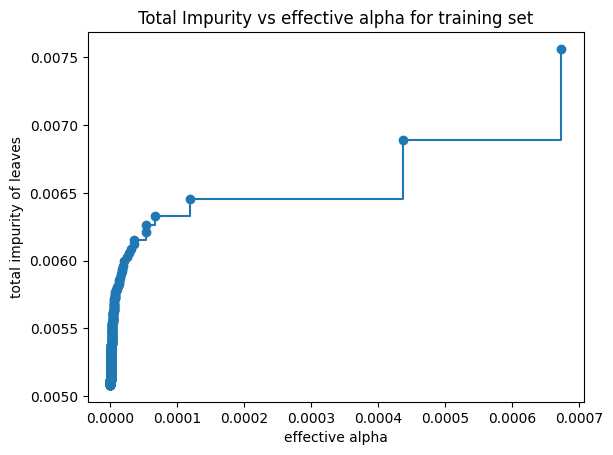

In [38]:
path = best_tree.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

We can see that as alpha increases total impurity of leaves increases.

Now, we will train different decision trees with different ccp_alpha's and we will store all the trained models to `clfs` list.

In [41]:


clfs = []
mse_scores = []
r2_scores = []
mae_scores=[]

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(max_depth=10,
                                 min_samples_leaf=20,
                                 min_samples_split=5,
                                 ccp_alpha=ccp_alpha)
    
    clf.fit(X, y)
    predictions = clf.predict(X)
    
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    mae=mean_absolute_error(y, predictions)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)



Number of nodes in the last tree is: 1 with ccp_alpha: 0.005242830444834637


The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

Now, for each trained model, we can print MSE and R2 Scores.

In [43]:

best_mse_index = mse_scores.index(min(mse_scores))
best_r2_index = r2_scores.index(max(r2_scores))
print(f"Best combination with minimum MSE:")
print(f"Alpha: {ccp_alphas[best_mse_index]}")
print(f"MSE: {mse_scores[best_mse_index]}")
print(f"R2 Score: {r2_scores[best_mse_index]}\n")

print(f"Best combination with maximum R2 Score:")
print(f"Alpha: {ccp_alphas[best_r2_index]}")
print(f"MSE: {mse_scores[best_r2_index]}")
print(f"R2 Score: {r2_scores[best_r2_index]}")


Best combination with minimum MSE:
Alpha: 6.10179170986425e-08
MSE: 0.005083650616914118
R2 Score: 0.6029855130035993

Best combination with maximum R2 Score:
Alpha: 0.0
MSE: 0.005083650616914119
R2 Score: 0.6029855130035993


We can see that R2 score has improved significantly after pruning. Our R2 score was around 0.5613330149617821 earlier and now the value of R2 score is 0.602985. Although there is not much change in MSE.


#### **Depth and Number of Nodes Vs Alpha**

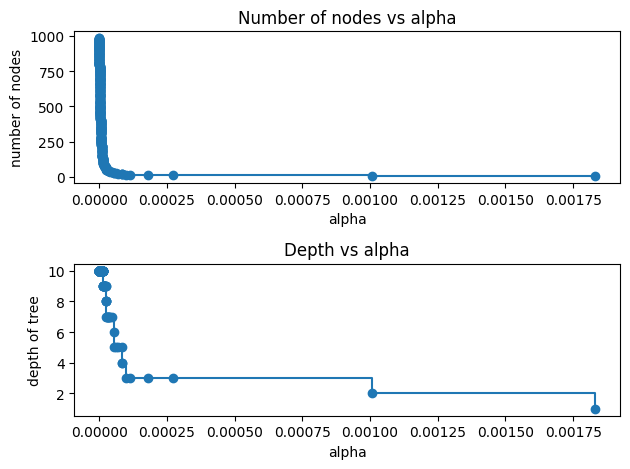

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We can see that number of nodes and depth both decreases as alpha increases. It is due the fact that as alpha increases regularization increases and it leades to a simpler tree.


#### **Accuracy Vs Aplha**

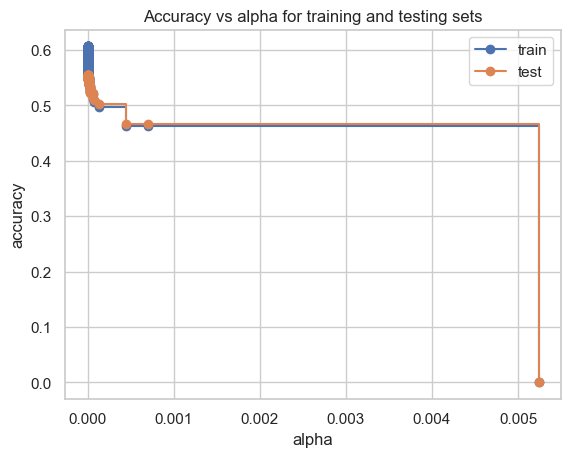

In [23]:
train_scores = [clf.score(X, y) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We can observe that accuracy decreases with increasing alpha and Accuracy is highest for 0 value of alpha. It is due to overfitting.

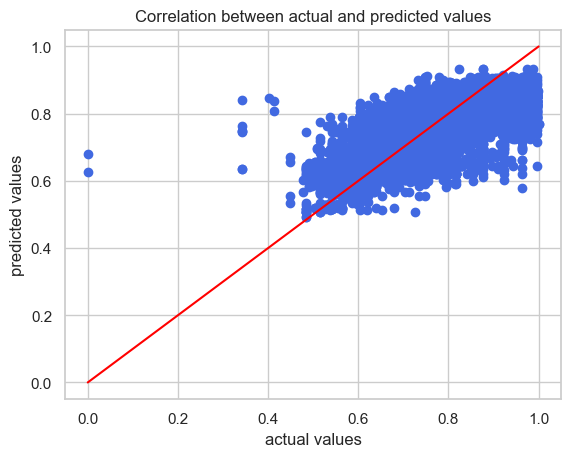

In [24]:
plt.title('Correlation between actual and predicted values')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.scatter(y_test,y_pred_tree,color='royalblue')
plt.plot([0,1],[0,1],color='red')
#plt.xlim(0, 0.2)
#plt.ylim(0, 0.2)
plt.show()

#### **Feature Importance**

['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


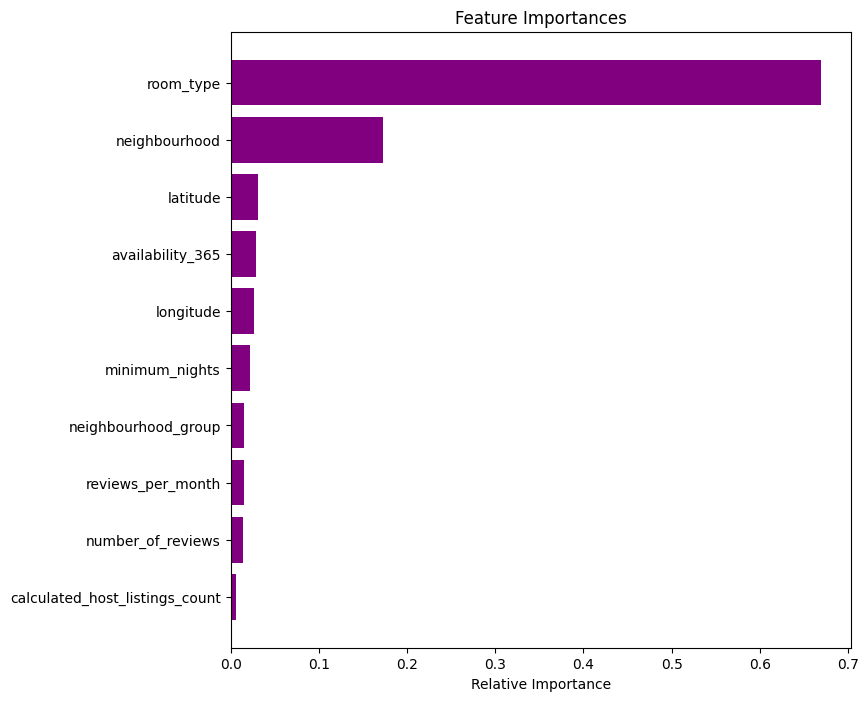

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)
importances = best_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can observe that contrary to regression the first two important features are the same but third most important feature in this case is latitude instead of longitude.

# **Random Forest**

Random Forest Regression is a powerful ensemble learning technique used for regression tasks. It constructs multiple decision trees during training and outputs the mean prediction of the individual trees as the final prediction.

### **Hyperparameter Tuning**

We will train the following parameters using 'RandomSearchCV':
- ***n_estimators*** (default=100):The number of trees in the forest.
- ***min_samples_leaf*** (default=1):The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

**Note** : In this case also, we are taking our parameter space to be small.

In [12]:

rf_regressor = RandomForestRegressor()
param_grid = {
    'n_estimators':[25,50, 100],
    'min_samples_leaf': [ 2, 4,8]
}

start_time=time.time()
grid_search_rf = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X, y)
best_rf = grid_search_rf.best_estimator_
best_model = RandomForestRegressor(
    n_estimators=best_rf.n_estimators,
    min_samples_leaf=best_rf.min_samples_leaf,
    )
best_model.fit(X, y)
y_pred_rf = best_model.predict(X_test)
exe_time_rf=time.time()-start_time


mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", -grid_search_rf.best_score_)
print("Mean Squared Error (MSE) of Random Forest:", mse_rf)
print("Mean Absolute Error (MAE) of Random Forest:", mae_rf)
print("Root Mean Squared Error (RMSE) of Random Forest:", rmse_rf)
print("R-squared (R2) Score of Random Forest:", r2_rf)
print("Time taken for execution:",exe_time_rf)

Best Parameters: {'min_samples_leaf': 8, 'n_estimators': 100}
Best Score: 0.005267191513563517
Mean Squared Error (MSE) of Random Forest: 0.005359377088004027
Mean Absolute Error (MAE) of Random Forest: 0.05648972640598618
Root Mean Squared Error (RMSE) of Random Forest: 0.07320776658254251
R-squared (R2) Score of Random Forest: 0.5872426961065593
Time taken for execution: 656.3749120235443


### **Feature Importance**

['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


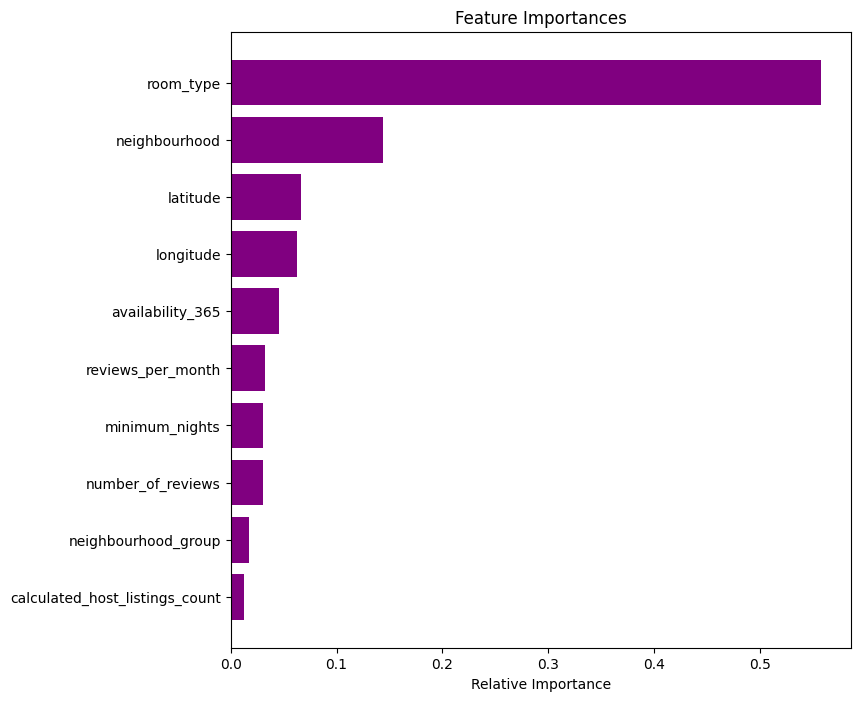

In [13]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We are getting same feature importance as decision trees. This might be due to the fact that both Decision Trees and Random Forests use Gini impurity or information gain to calculate feature importance. If the datasets and hyperparameters used for both models are similar, the calculated feature importance values might also be similar.

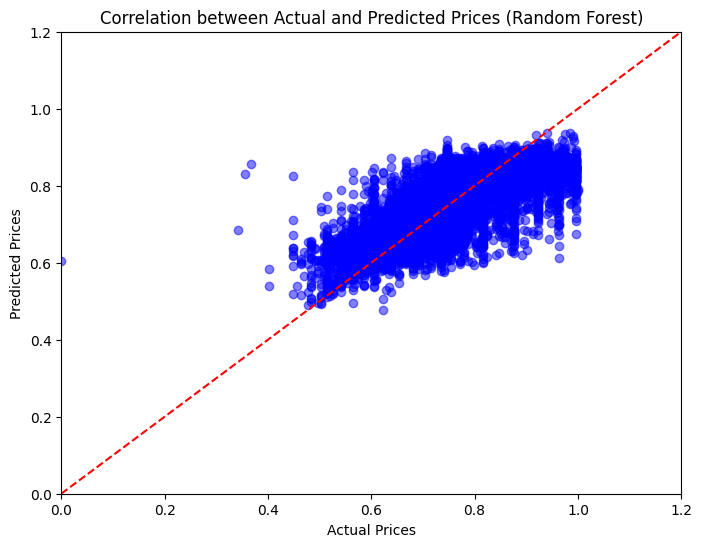

In [14]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([0, 1.2], [0, 1.2], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show()


# **AdaBoosting**




## **AdaBoosting with DecisionTree**

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. So, we will fit AdaBoost regressor on DecisionTree Regressor.

In this case, base learner is Decision Tree. Each weak learner (base learner) is typically a shallow decision tree, often referred to as a "stump," which consists of only a single decision node and two leaf nodes. These decision trees are simple and often have limited depth.AdaBoost with decision trees can achieve good performance, especially when the decision trees are carefully tuned to balance bias and variance. However, due to the simplicity of the individual trees, it may not capture complex relationships in the data as effectively.

Here, we are using above trained decision tree i.e. `best_tree`

### **Hypertuning**

We will first perform cross-validation for hyperparameter tuning with Adaboost using GridSearchCV for the following parameters-

- ***n_estimators***:The maximum number of estimators at which boosting is terminated.

- ***learning_rate***:Weight applied to each regressor at each boosting iteration. A higher learning rate increases the contribution of each regressor.


In [ ]:


# Define the parameter grid for tuning
param_grid = {
    'n_estimators':[50,100],
    'learning_rate': [0.01, 0.001, 0.1]
}

start_time=time.time()
ada_regressor2 = AdaBoostRegressor(estimator=best_tree, random_state=42)
grid_search_ada2 = GridSearchCV(estimator=ada_regressor2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ada2.fit(X, y)
best_ada2 = grid_search_ada2.best_params_
best_ada_regressor2 = AdaBoostRegressor(estimator=best_tree,
                                       learning_rate=best_ada2['learning_rate'],
                                       n_estimators=best_ada2['n_estimators'],
                                       random_state=42)
best_ada_regressor2.fit(X, y)
y_pred_ada2 = best_ada_regressor2.predict(X_test)
exe_time_ada_dt=time.time()-start_time

print("Best Parameters:", grid_search_ada2.best_params_)
print("Best Score:", -grid_search_ada2.best_score_)


mse_ada2 = mean_squared_error(y_test, y_pred_ada2)
mae_ada2 = mean_absolute_error(y_test, y_pred_ada2)
rmse_ada2 = np.sqrt(mse_ada2)
r2_ada2 = r2_score(y_test, y_pred_ada2)

print("Mean Squared Error (MSE) of Random Forest:", mse_ada2)
print("Mean Absolute Error (MAE) of Random Forest:", mae_ada2)
print("Root Mean Squared Error (RMSE) of Random Forest:", rmse_ada2)
print("R-squared (R2) Score of Random Forest:", r2_ada2)
print("Time taken for execution: ",exe_time_ada_dt)


Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.005361253601371244
Mean Squared Error (MSE) of Random Forest: 0.005484046356353916
Mean Absolute Error (MAE) of Random Forest: 0.05722964585984183
Root Mean Squared Error (RMSE) of Random Forest: 0.07405434731569725
R-squared (R2) Score of Random Forest: 0.5704467331195546
Time taken for execution:  406.87110686302185


### **Feature Importnce**

['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


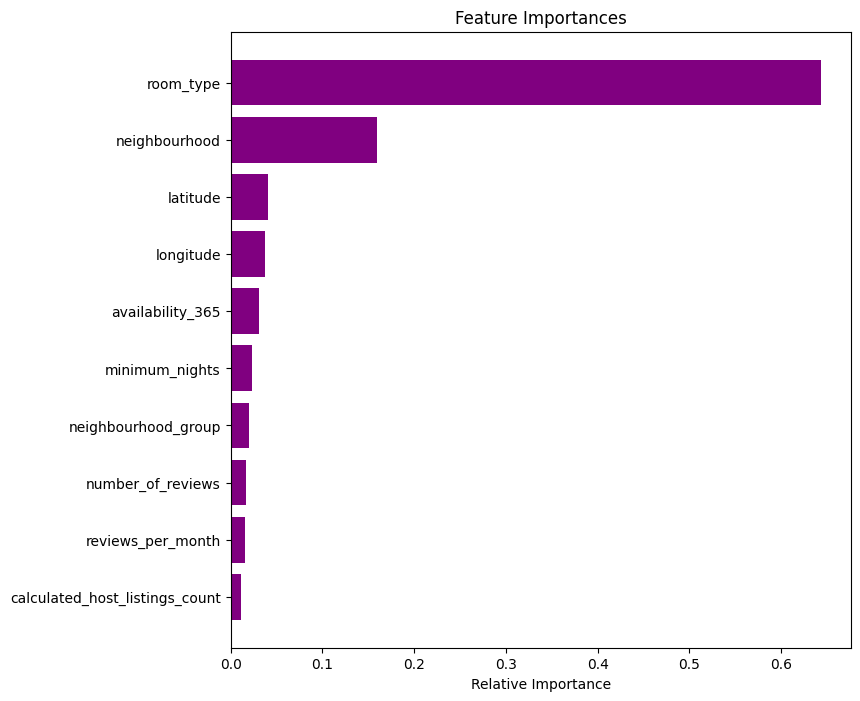

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)
importances = best_ada_regressor2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Remark:** The feature importance in AdaBoost is based on the importance assigned by its underlying base classifier. If a Decision Tree serves as the base classifier, the feature importance in AdaBoost is calculated by averaging the importance values from each individual Decision Tree that is why we are getting similar feature importance.

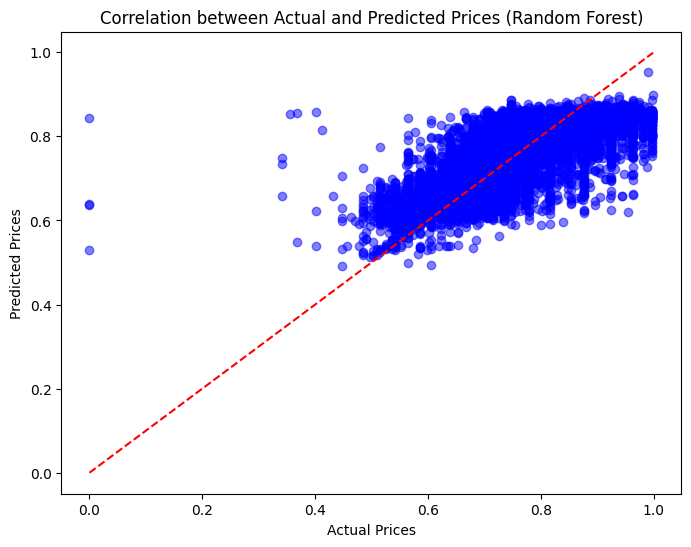

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ada2, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


# **XGBoosting**
Now, we will use XGBoosting to predict the prices.XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting machines, which are ensemble learning methods used for both regression and classification tasks. XGBoost is based on the concept of gradient boosting, which combines multiple weak learners (typically decision trees) sequentially to build a strong predictive model.

### **Hypertuning**

We will hypertune the following parameters-

- ***eta (learning rate)***: Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

- ***max_depth***: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.

- ***subsample***: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.

- ***max_leaves***: Maximum number of nodes to be added.

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.3,0.8],
    'max_depth': [3, 7,10],
    'subsample': [0.3,0.5,1],
    'max_leaves':[5,20,40]
}
start_time=time.time()
xgb_reg = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X, y)
best_params_xgb = grid_search_xgb.best_params_
best_xgb_reg = xgb.XGBRegressor(**best_params_xgb)
best_xgb_reg.fit(X, y)
y_pred_xgb = best_xgb_reg.predict(X_test)
exe_time_xgb=time.time()-start_time

print("Best Hyperparameters:", best_params_xgb)
print("Best Score:", -grid_search_xgb.best_score_)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("R-squared (R2) Score:", r2_xgb)
print("time taken for execution:",exe_time_xgb )


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'max_leaves': 20, 'subsample': 1}
Best Score: 0.005339892277625313
Mean Squared Error (MSE): 0.005280449111198664
Mean Absolute Error (MAE): 0.05633560543766382
R-squared (R2) Score: 0.5818693214570206
time taken for execution: 96.85742735862732


### **Actual Vs Predicted Values**

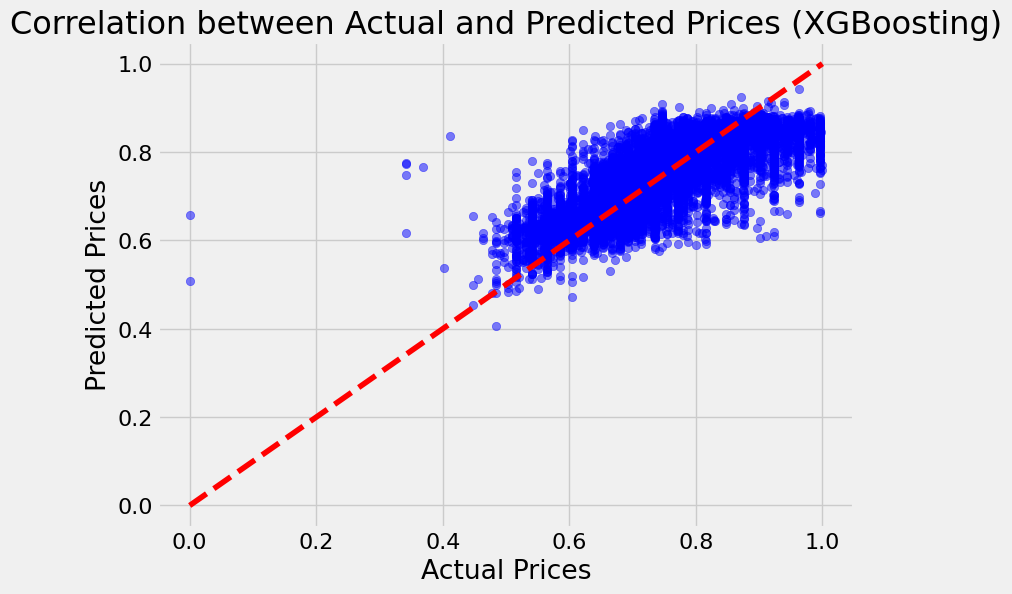

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (XGBoosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Learning Curve**

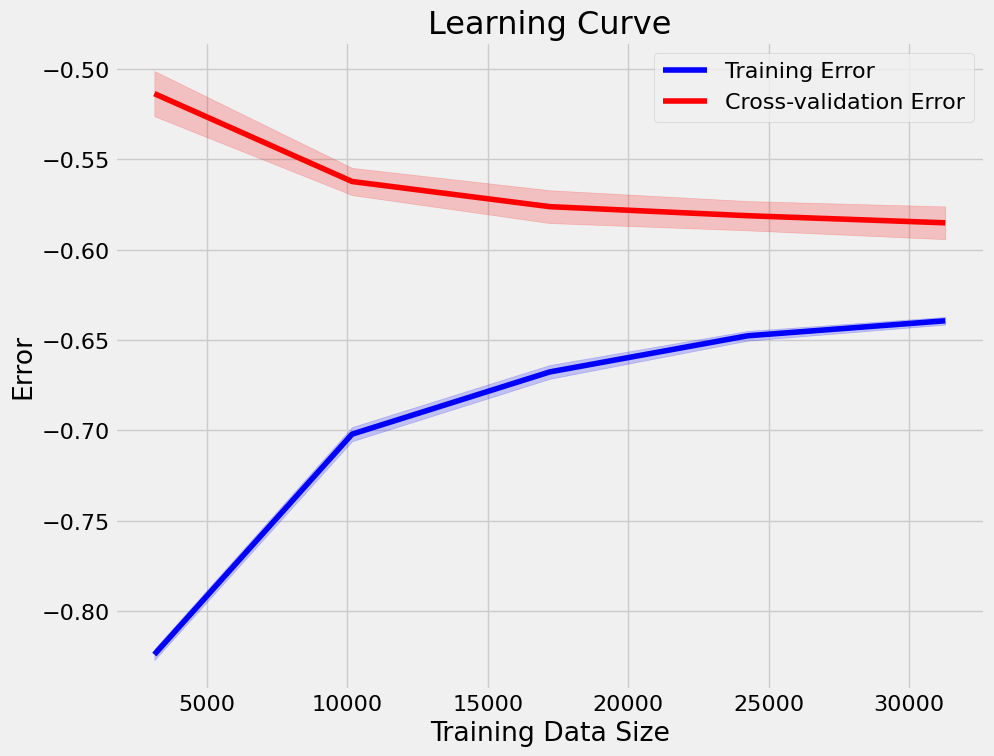

In [ ]:


# Step 4: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_xgb_reg, X, y, cv=5)
train_errors, test_errors = -train_scores, -test_scores
train_mean = np.mean(train_errors, axis=1)
train_std = np.std(train_errors, axis=1)
test_mean = np.mean(test_errors, axis=1)
test_std = np.std(test_errors, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation Error', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Data Size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

**REMARK:**
Training Error Curve shows how the model's performance (usually measured by error) changes as the size of the training set increases. Initially, with a small training set, the model can fit the data well, resulting in low training error. However, as more data is added, the model may struggle to fit all the intricacies of the data, leading to higher training error.

Cross-Validation Error Curve curve shows how well the model generalizes to unseen data (cross-validation set) as the training set size increases. Initially, with a small training set, the model may generalize poorly, resulting in high cross-validation error. As more data is added, the model's performance on the cross-validation set typically improves, reflecting better generalization.

Ideally, both curves should converge to a low value as the training set size increases, indicating that the model is both fitting the training data well and generalizing effectively to new data.

### **Feature Importance Curve**

Now, we will generate a plot showing the importance of the features in the XGBoost model `best_xgb_reg`. This plot will display the relative importance of the top features used by the model to make predictions. The features are ranked based on their importance scores, with the most important features appearing at the top.

**F Score**:This is a metric that simply sums up how many times each feature is split on. It is a metric that quantifies the importance of each feature. We have specified here `importance_type='gain'`. By Default, it displays importance with `importance_type='weights'`. We might get different results with different importance_type.

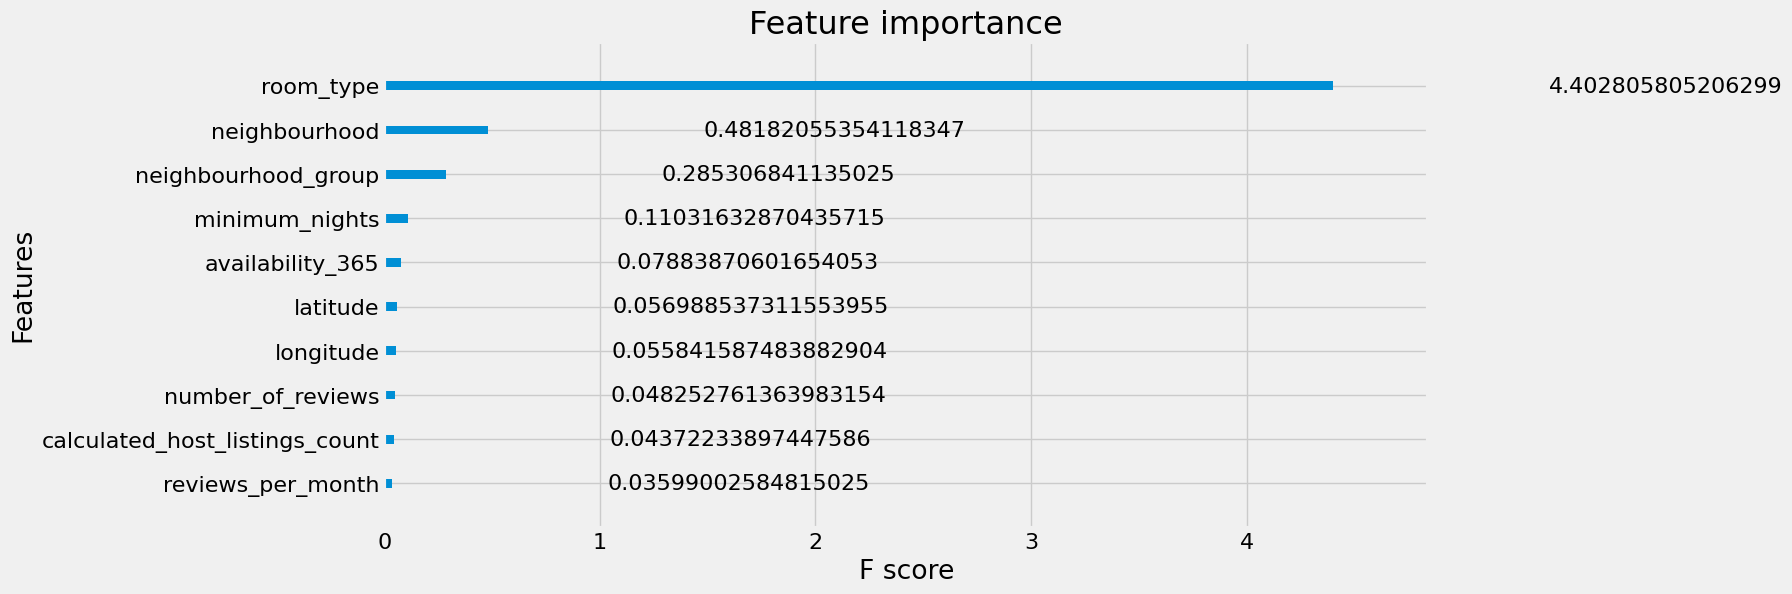

In [ ]:

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_reg, max_num_features=10, ax=ax, importance_type='gain')
plt.show();

Instead of F-Score, we can also use `best_xgb_reg.feature_importances_` that we used in earlier cases which also gives results based on 'gain'.

['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


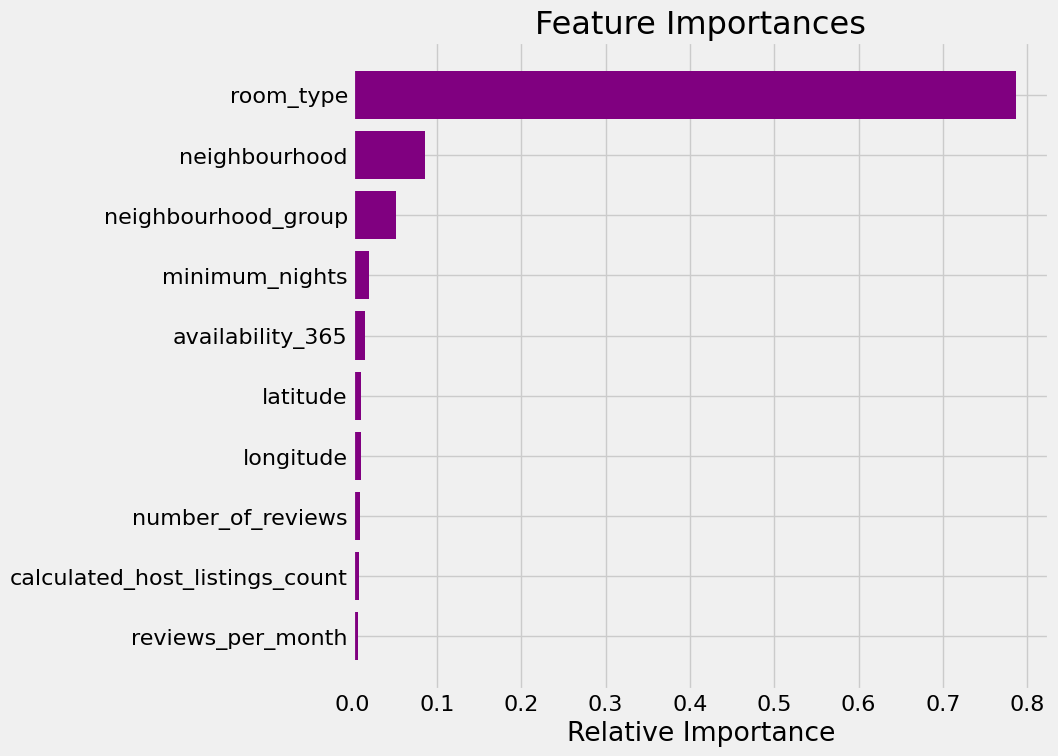

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)
importances = best_xgb_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Firstly, we can observe that we are getting the same results with both the methods. `feature_importances` returns weights that sum upto 1 while `importance_type='weight'` returns results based on number of occurences in splits.

* We can observe that we are agin getting room_type, neighbourhood as the two most imortant features. 

* Here, contrary to all the methods implemented above neighbourhood_group is the third most important feature.

* Another thing that can be noticed is that latitude and longitude are even placed below minimum_nights and availability_365.

## Regularization

Regularization in gradient boosted regression trees are applied to the leaf values and not the feature coefficients like in lasso/ridge regression. The loss function is defined as-

$$L = \sum_{i=0}^{n} \text{loss}(y_{\text{res}}, h(x)) + \frac{1}{2}\lambda \sum_{j=1}^{T} w_j^2 + \alpha \sum_{j=1}^{T} |w_j|$$

`reg_alpha` and `reg_lambda` control the L1 and L2 regularization terms respectively.

## **L1 Regularization**

We will now hypertune the following parameter to employ hypertuning-

**`reg_alpha`**: L1 regularization term on weights. Increasing this value will make model more conservative. Normalised to number of training examples.

In [49]:

param_grid = {
    'learning_rate': [0.01, 0.3,0.8],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1],
    'max_leaves': [5, 20,40],
    'reg_alpha': [0.01, 0.1, 1,2]  # L1 regularization parameter (alpha)
}


xgb_reg_l1 = xgb.XGBRegressor()

start_time=time.time()
grid_search_xgb_reg_l1 = GridSearchCV(estimator=xgb_reg_l1, param_grid=param_grid,
                               cv=5, scoring='neg_mean_squared_error')
grid_search_xgb_reg_l1.fit(X, y)
best_params_xgb_reg_l1 = grid_search_xgb_reg_l1.best_params_
best_xgb_reg_l1 = xgb.XGBRegressor(**best_params_xgb_reg_l1)
best_xgb_reg_l1.fit(X, y)
y_pred_xgb_l1 = best_xgb_reg_l1.predict(X_test)
exe_time_xgb_l1=time.time()-start_time

mse_xgb_l1 = mean_squared_error(y_test, y_pred_xgb_l1)
mae_xgb_l1 = mean_absolute_error(y_test, y_pred_xgb_l1)
r2_xgb_l1 = r2_score(y_test, y_pred_xgb_l1)

print("Mean Squared Error (MSE):", mse_xgb_l1)
print("Mean Absolute Error (MAE):", mae_xgb_l1)
print("R-squared (R2) Score:", r2_xgb_l1)
print("Time taken for execution: ",exe_time_xgb_l1)

print("Best Hyperparameters:", best_params_xgb_reg_l1)
print("Best Score:", -grid_search_xgb_reg_l1.best_score_)

Mean Squared Error (MSE): 0.005327147105754752
Mean Absolute Error (MAE): 0.05675351722156291
R-squared (R2) Score: 0.5919420368957763
Time taken for execution:  730.286333322525
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 5, 'max_leaves': 40, 'reg_alpha': 1, 'subsample': 1}
Best Score: 0.00526513860102921


### **Correlation Plot between Actual and Predicted Prices**

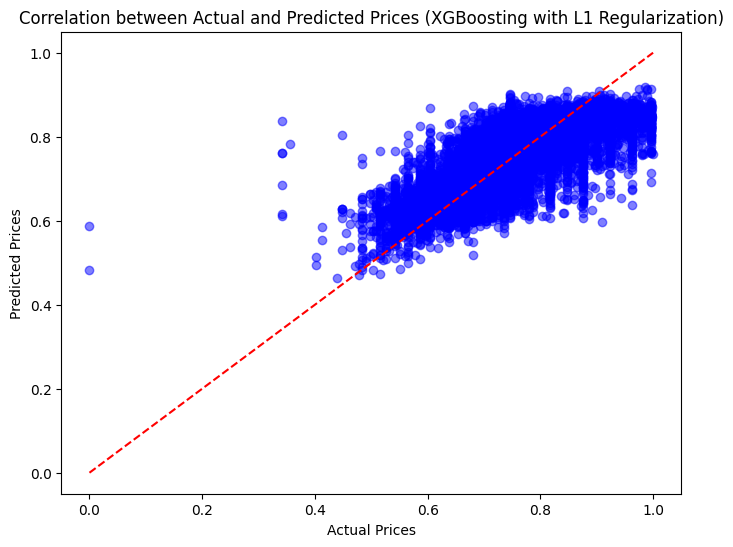

In [50]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_l1, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (XGBoosting with L1 Regularization)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Feature Importance Curve**

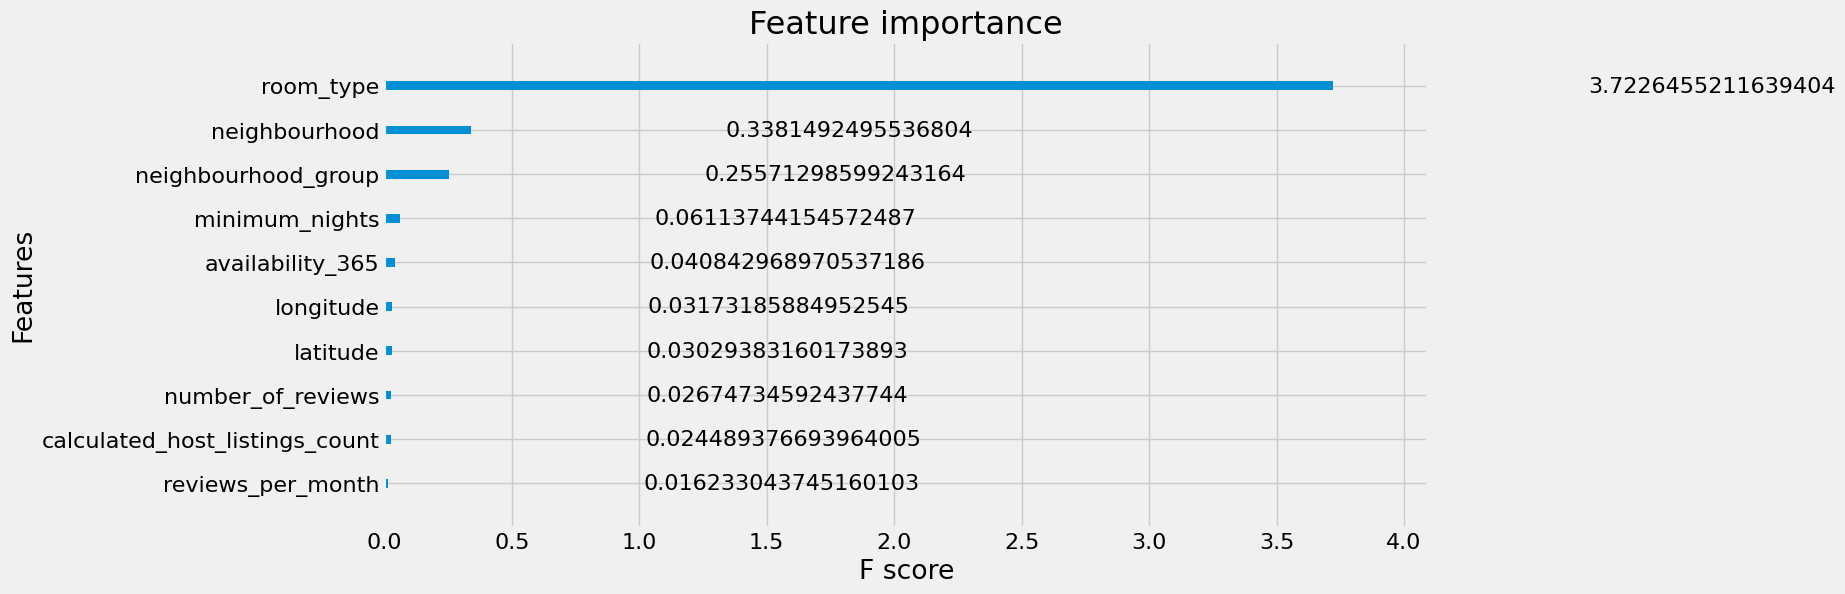

In [51]:

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_reg_l1, max_num_features=10, ax=ax,importance_type='gain')
plt.show();


The feature importance in this case is almost same as above. The F-Scores are also almost similar for different features. One thing to observe is that the ranking of latitude and longtitude is reversed in this case. Here, longitude is more important than latitude.

## **L2 regularization**

In [ ]:

param_grid_l2= {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1],
    'max_leaves': [5, 10, 20],
    'reg_lambda': [0, 0.1, 1,2]  # L2 regularization parameter (lambda)
}

xgb_reg_l2 = xgb.XGBRegressor()
start_time=time.time()
grid_search_xgb_reg_l2 = GridSearchCV(estimator=xgb_reg_l2, param_grid=param_grid_l2,
                               cv=5, scoring='neg_mean_squared_error')
grid_search_xgb_reg_l2.fit(X, y)
best_params_xgb_reg_l2 = grid_search_xgb_reg_l2.best_params_
best_xgb_reg_l2 = xgb.XGBRegressor(**best_params_xgb_reg_l2)
best_xgb_reg_l2.fit(X, y)
y_pred_xgb_l2 = best_xgb_reg_l2.predict(X_test)
exe_time_xgb_l2=time.time()-start_time
mse_xgb_l2 = mean_squared_error(y_test, y_pred_xgb_l2)
mae_xgb_l2 = mean_absolute_error(y_test, y_pred_xgb_l2)
r2_xgb_l2 = r2_score(y_test, y_pred_xgb_l2)

print("Mean Squared Error (MSE):", mse_xgb_l2)
print("Mean Absolute Error (MAE):", mae_xgb_l2)
print("R-squared (R2) Score:", r2_xgb_l2)
print("Accuracy:", (1-mse_xgb_l2)*100)
print("Best Hyperparameters:", best_params_xgb_reg_l2)
print("Best Score:", -grid_search_xgb_reg_l2.best_score_)
print("Time taken for execution: ",exe_time_xgb_l2)

Mean Squared Error (MSE): 0.01405421993689785
Mean Absolute Error (MAE): 0.09453963665887645
R-squared (R2) Score: 0.5519198419148349
Accuracy: 98.59457800631021
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 20, 'reg_lambda': 1, 'subsample': 0.7}
Best Score: 0.013691725657426481
Time taken for execution:  705.2773504257202


### **Correlation between Actual and Predicted Prices**

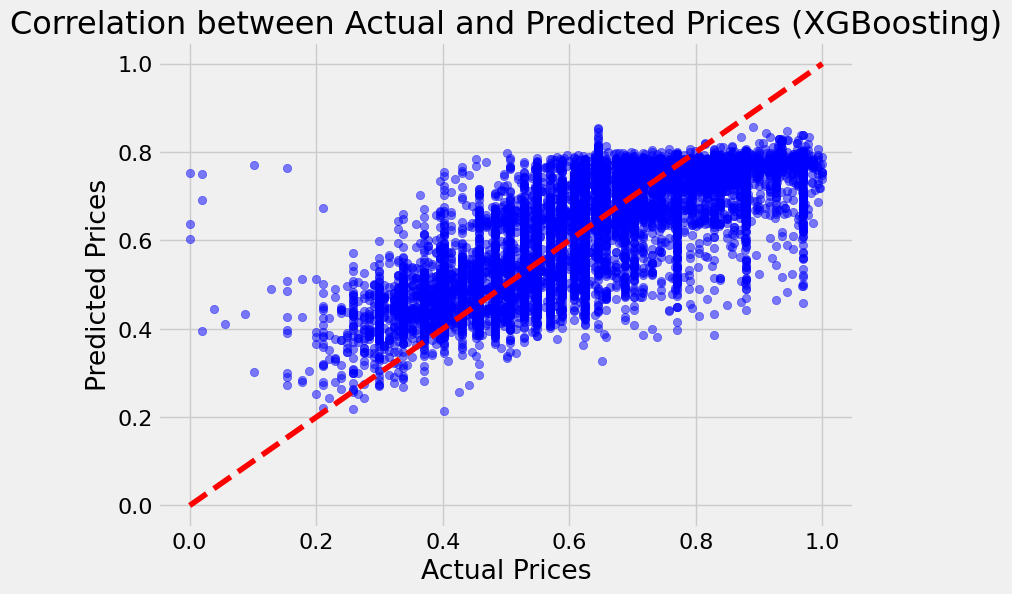

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_l2, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (XGBoosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Learning Curve**

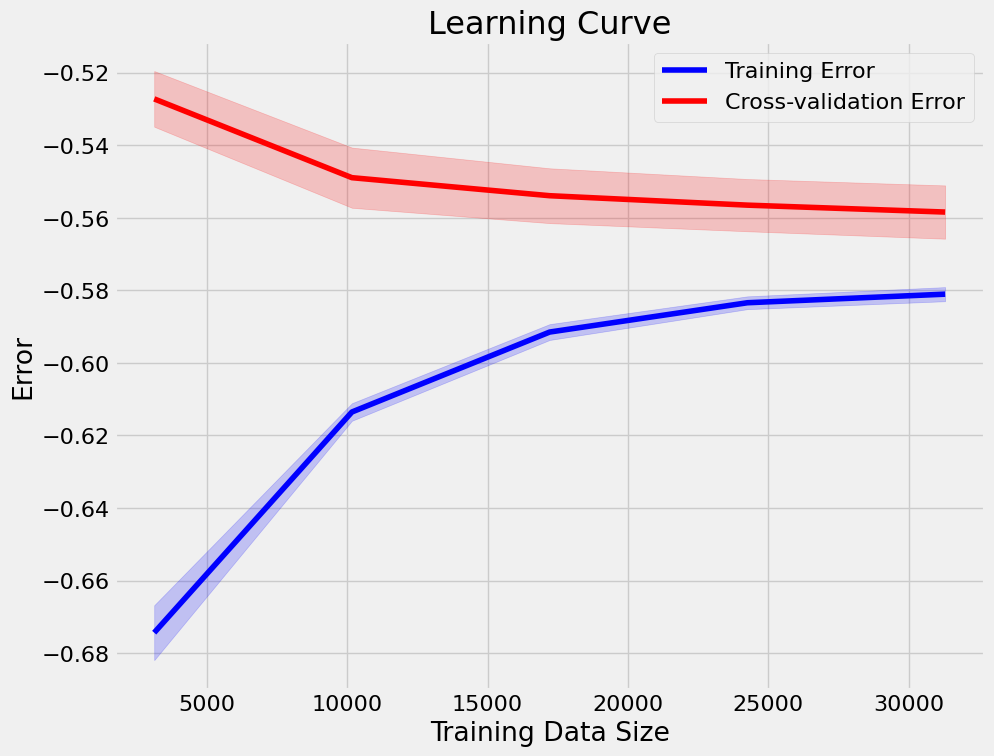

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(best_xgb_reg_l2, X, y, cv=5)
train_errors, test_errors = -train_scores, -test_scores
train_mean = np.mean(train_errors, axis=1)
train_std = np.std(train_errors, axis=1)
test_mean = np.mean(test_errors, axis=1)
test_std = np.std(test_errors, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation Error', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Data Size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### **Feature Importance**

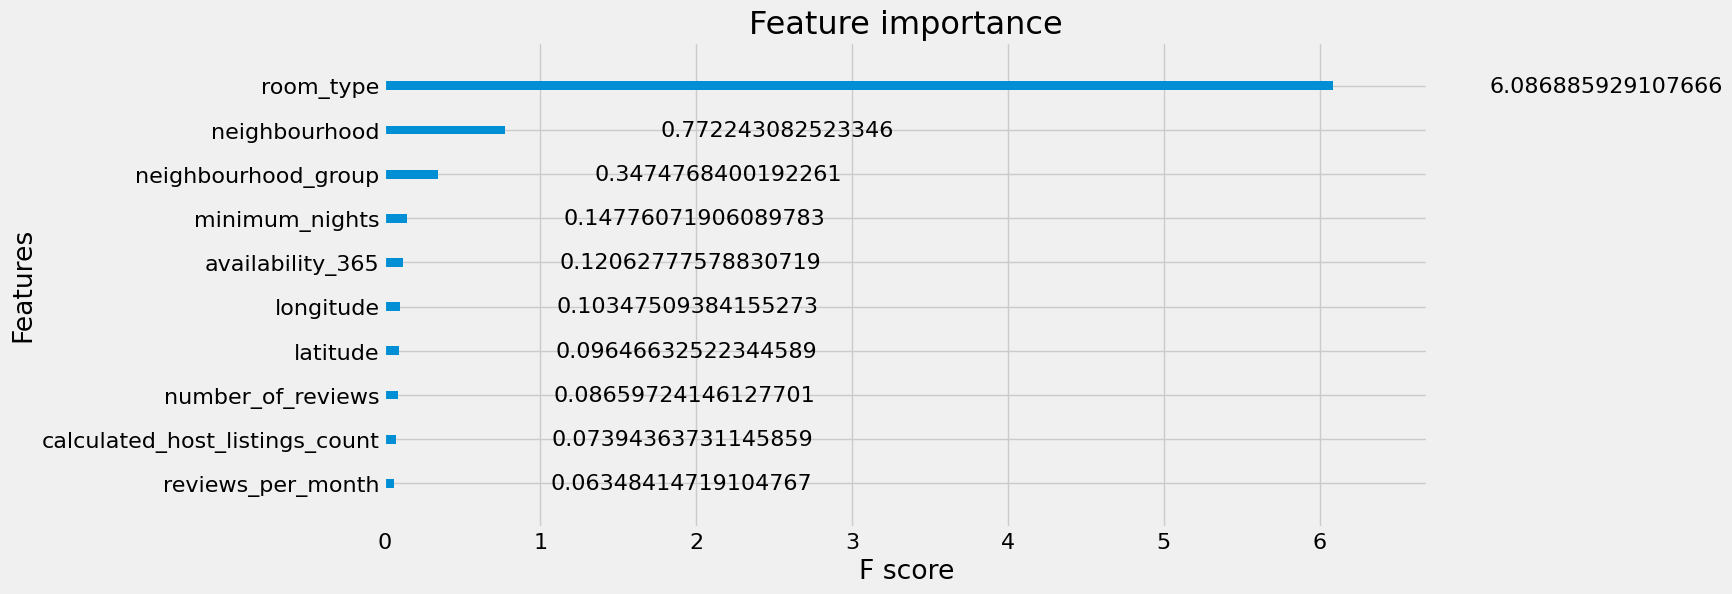

In [53]:

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_reg_l2, max_num_features=10, ax=ax,importance_type='gain')
plt.show()


We can observe that F-Score of room_type here is almost double for room_type compared to L1 Regularization in Xgboosting. Although ranking of features is similar to that of L1 regularization, this diiference in scores can be observed in other features as well.

## **Elastic Net**

In [57]:

param_grid_en = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.5, 0.7],
    'max_leaves': [5, 10],
    'alpha': [0.1,0.5, 1,2],  # L1 regularization parameter (Elastic Net)
    'reg_lambda': [0.1,0.5,1,2]  # L2 regularization parameter (Elastic Net)
}
start_time=time.time()
xgb_reg_en = xgb.XGBRegressor()
grid_search_xgb_en = GridSearchCV(estimator=xgb_reg_en, param_grid=param_grid_en,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_xgb_en.fit(X, y)
best_params_xgb_en = grid_search_xgb_en.best_params_
best_xgb_reg_en = xgb.XGBRegressor(**best_params_xgb_en)
best_xgb_reg_en.fit(X, y)
y_pred_xgb_en = best_xgb_reg_en.predict(X_test)
exe_time_xgb_elastic_net=time.time()-start_time

print("Best Hyperparameters:", best_params_xgb_en)
print("Best Score:", -grid_search_xgb_en.best_score_)
mse_xgb_en = mean_squared_error(y_test, y_pred_xgb_en)
mae_xgb_en = mean_absolute_error(y_test, y_pred_xgb_en)
r2_xgb_en = r2_score(y_test, y_pred_xgb_en)

print("Mean Squared Error (MSE):", mse_xgb_en)
print("Mean Absolute Error (MAE):", mae_xgb_en)
print("R-squared (R2) Score:", r2_xgb_en)
print("Time taken for execution:",exe_time_xgb_elastic_net)





Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Hyperparameters: {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'reg_lambda': 2, 'subsample': 0.5}
Best Score: 0.005428699780177507
Mean Squared Error (MSE): 0.005549519079729241
Mean Absolute Error (MAE): 0.05814229727052576
R-squared (R2) Score: 0.5749084065209982
Time taken for execution: 349.0767560005188


### **Correlation between Actual and Predicted Prices**

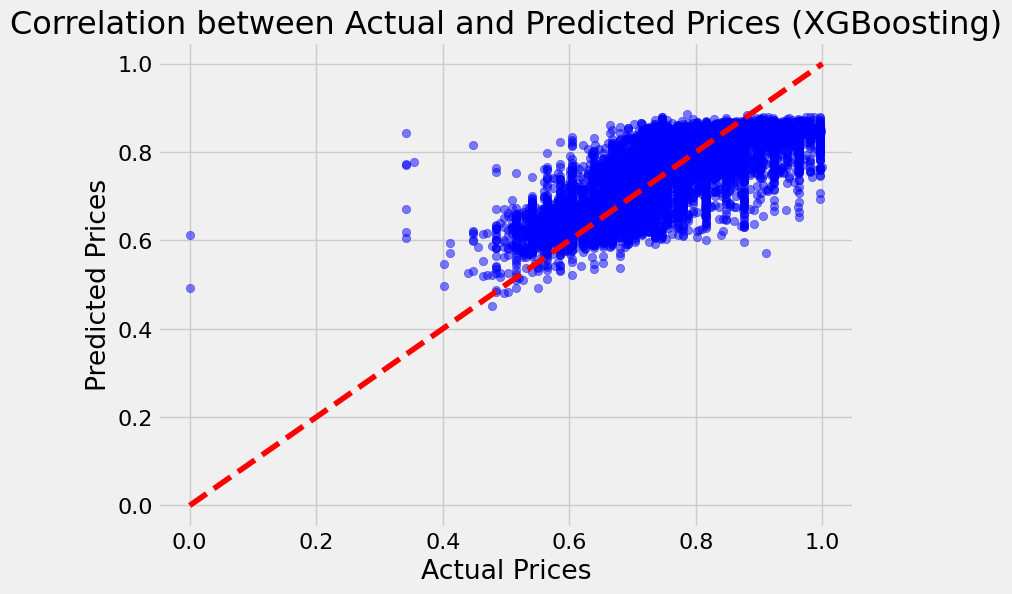

In [58]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb_en, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices (XGBoosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Training Curve**

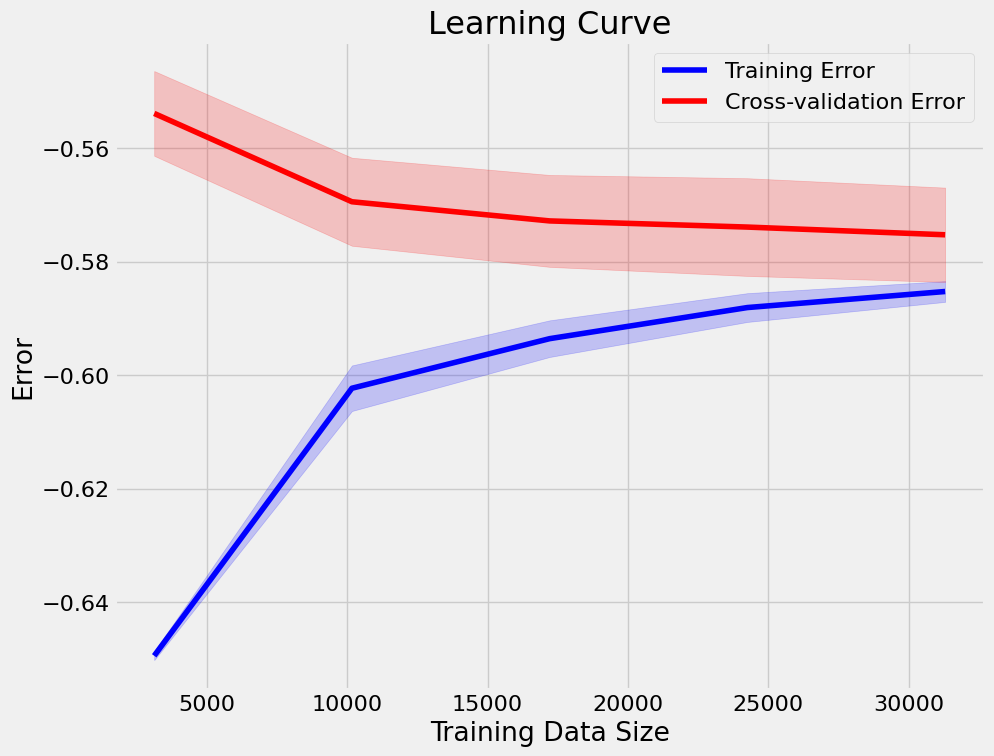

In [59]:

train_sizes, train_scores, test_scores = learning_curve(best_xgb_reg_en, X, y, cv=5)
train_errors, test_errors = -train_scores, -test_scores
train_mean = np.mean(train_errors, axis=1)
train_std = np.std(train_errors, axis=1)
test_mean = np.mean(test_errors, axis=1)
test_std = np.std(test_errors, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation Error', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Data Size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()


### **Feature Importance**

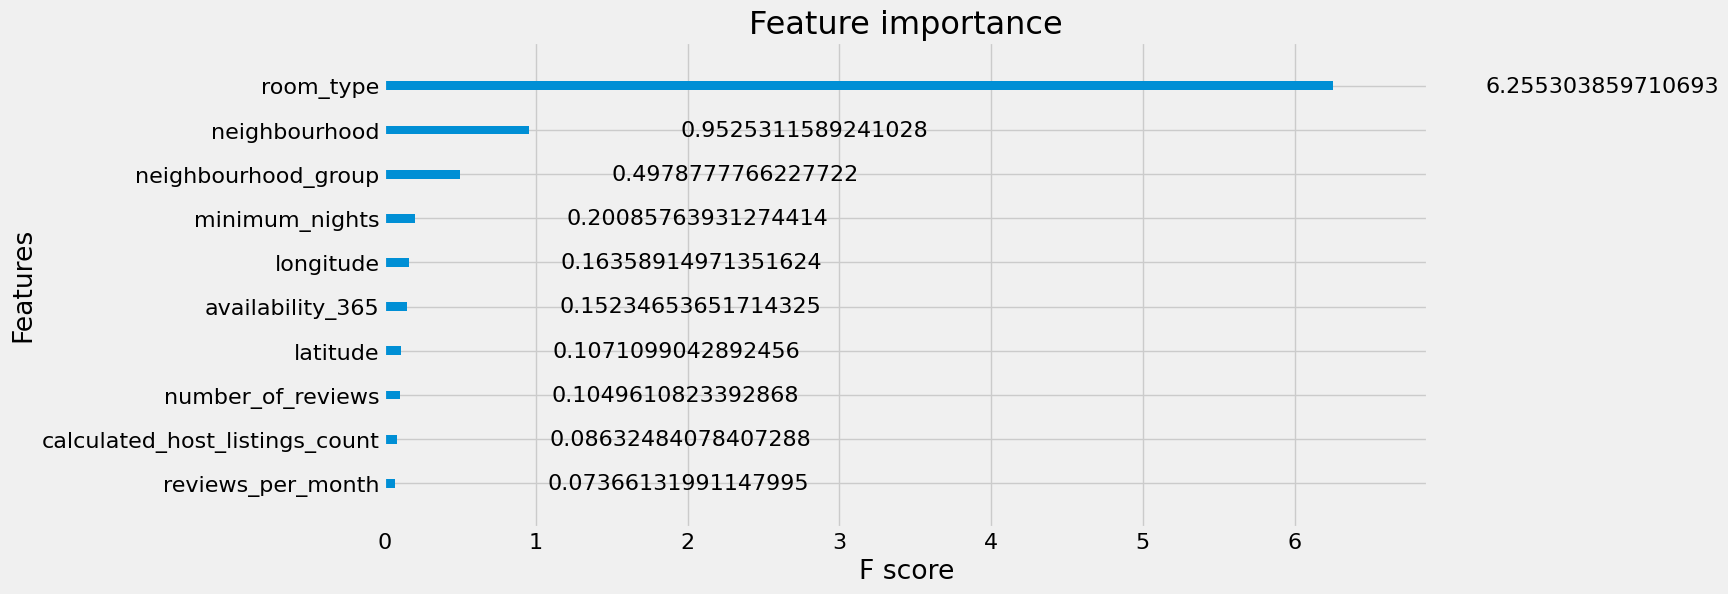

In [60]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_reg_en, max_num_features=10, ax=ax,importance_type='gain')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

The first four most important features in tis case are again same as for the above cases of Xgboosting that are room_type, neighbourhood, neighbourhood_group and minimum_nights. Surprisingly, instead of availability_365, longitude emerges as next most important feature.

# **Neural Networks**

I am using Keras to implement neural networks for predicting prices. First, we will consider Nueral Network with 2 hidden layers and we will introduce this class of Neural Network with number of neurons for hidden layers as 10 and 12 respectively. Then, I will initialize `KerasRegressor` and hyperparameter grid to do Grid serach for optimal parameters. I will implement `GridSeachCV` for `optimizer`, `batch_size` and `epochs`. I will also measure the execution time.

In [ ]:
def create_model(dropout_rate=0.3, neurons1=10, neurons2=12, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=10, kernel_initializer='uniform', activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

start_time = time.time()

# Initialize the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'optimizer': ['SGD', 'Adagrad', 'Adam'],
    'batch_size': [20, 60, 100,150],
    'epochs': [10, 50, 100]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

grid_result = grid.fit(X, y)

best_params_nn = grid_result.best_params_
best_nn = KerasRegressor(build_fn=create_model, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'], optimizer=best_params_nn['optimizer'], verbose=0)

best_nn.fit(X, y)
y_pred_nn = best_nn.predict(X_test)

exe_time_nn = time.time() - start_time
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Time taken for execution :", exe_time_nn)


c:\Users\kanup\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\kanup\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kanup\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\kanup\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core

Best: -0.008613 using {'batch_size': 100, 'epochs': 50, 'optimizer': 'Adagrad'}
Time taken for execution : 2520.1823201179504


In [28]:
mse = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test, y_pred_nn)
print(f"R^2 Score: {r2}")
print("MAE:",mean_absolute_error(y_test,y_pred_nn))


Mean Squared Error (MSE): 0.00667710931167082
R^2 Score: 0.4944495614059299
MAE: 0.06408678712063993


### **Visualizing the model**

We can visualize the architecture of created neural network using `Graphviz` and Keras's `plot_model` function.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


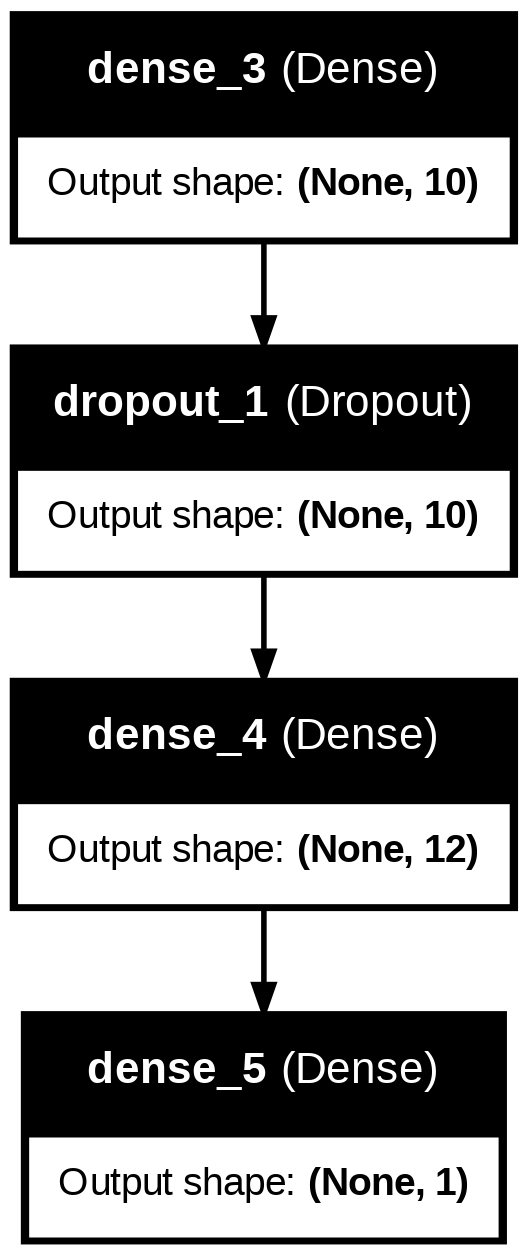

In [19]:
import os
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot

os.environ["PATH"] += os.pathsep + '/usr/bin/'

model = create_model()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


### **Learning Curve**

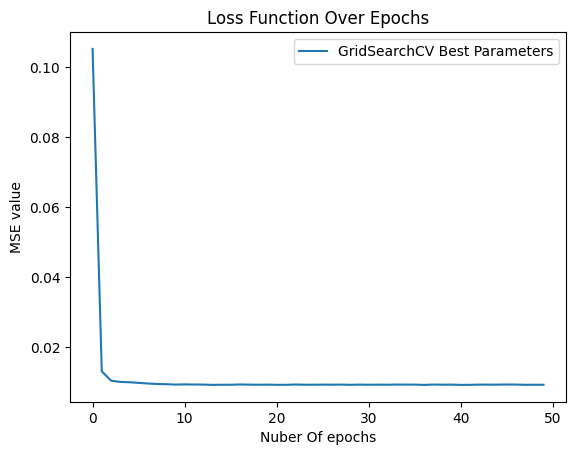

In [ ]:
plt.plot(best_nn.history_['mean_squared_error'], label='GridSearchCV Best Parameters')
plt.title('Loss Function Over Epochs')
plt.ylabel('MSE value')
plt.xlabel('Nuber Of epochs')
plt.legend(loc="upper right")
plt.show()

Here, we are using `best_nn.history_` and plotting MSE values against Number Of epochs. We can see that there is sudden drop in MSE value and it then became almost constant.

### **Actual Vs Predicted Values**

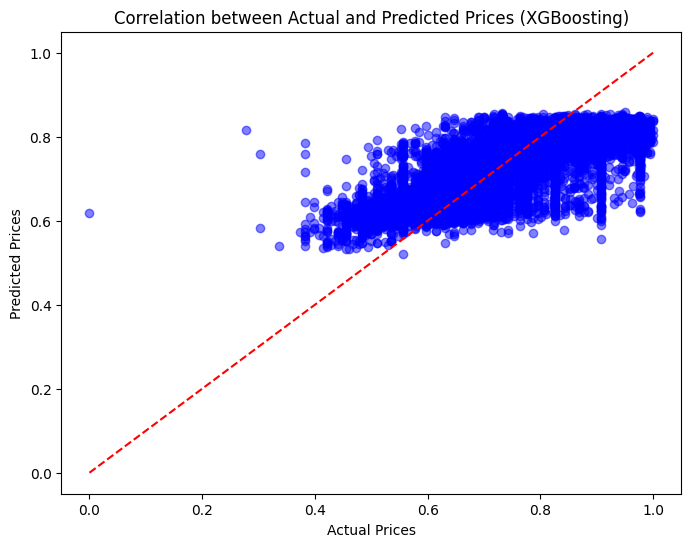

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Correlation between Actual and Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### **Feature Importance**

We are using `sklearn.inspection.permutation_importance` to calculate feature importance here because there is no direct attribute which can directly give feature importance for neural networks. Basically, It is a model inspection technique that measures contribution of different features. This method requires a fitted estimator which is `best_nn` in our case. The permutation importance of a feature is determined through the following process. Initially, a baseline metric is computed using a specific scoring method on a dataset represented by X, which might differ from the original dataset. Then, a feature column from the validation set is shuffled, and the metric is recalculated. The permutation importance is the discrepancy between the baseline metric and the metric obtained after shuffling the feature column

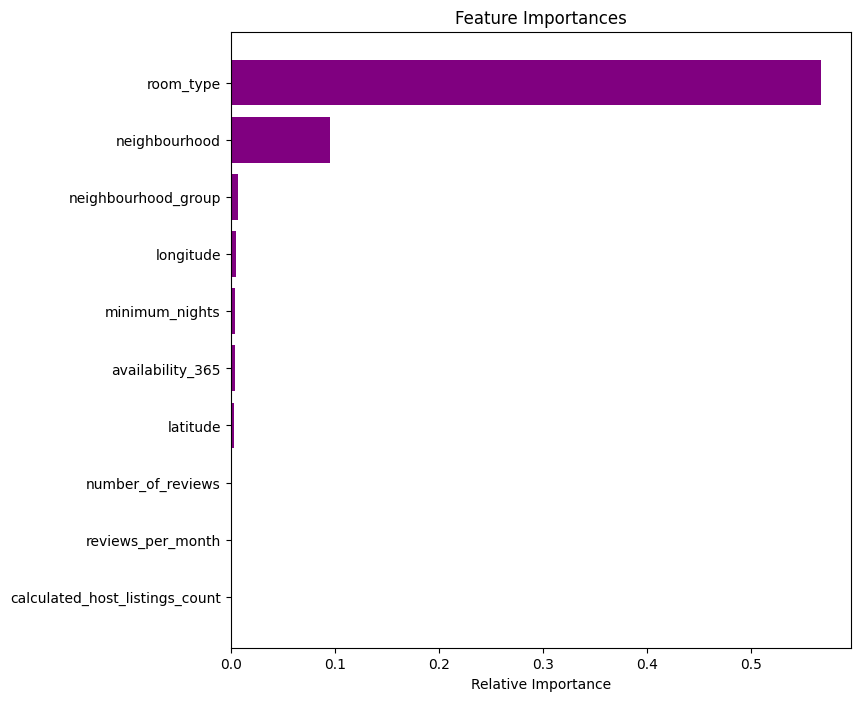

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


result = permutation_importance(best_nn, X, y, n_repeats=10, random_state=42)


importances = result.importances_mean
indices = np.argsort(importances)


plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


* In this case top two features are same as the other models. Third most important feature is neighbourhood_group like in the case of Xgbosting. Another important feature is longitude followed by minimum nights. 

* Another noticeable thing is that other than two features other features are given very little to no importance at all.

# **Model Comparison**

First, I will make a dictionary of "Mean Squared Error","R2 coefficient","Accuracy" and "Time of Execution" for all models. 

In [38]:

models_performance = {
    "Linear Regression": {
        "MSE": 0.006162311026948809,
        "R2": 0.5246878672769313,
        "Time": 0.15488386154174805,
        "MAE": 0.06147365663827182
    },
    "Ridge Regression": {
        "MSE": 0.006162437881922378,
        "R2": 0.5246780826834938,
        "Time": 39.33100175857544,
        "MAE": 0.061475972622331385
    },
    "Lasso": {
        "MSE": 0.006162316478370297,
        "R2": 0.524687446797218,
        "Time": 66.15111255645752,
        "MAE": 0.06147373037081467
    },
    "Elastic Net": {
        "MSE": 0.006162373027868396,
        "R2": 0.5246830850143693,
        "Time": 745.6807150840759,
        "MAE": 0.06147457684930935
    },
    "Decision Tree": {
        "MSE": 0.005687215227544729,
        "R2": 0.5613330149617821,
        "Time": 198.36582016944885,
        "MAE": 0.058864906911329846,
    },
    "Random Forest": {
        "MSE": 0.005359377088004027,
        "R2": 0.5872426961065593,
        "Time":  656.3749120235443,
        "MAE": 0.05648972640598618
        
    },
    
    "Adaboost with DT": {
        "MSE": 0.005484046356353916,
        "R2": 0.5704467331195546,
        "Time": 406.87110686302185,
        "MAE":0.05722964585984183
    },
    "Xgboost without reg": {
        "MSE": 0.005280449111198664,
        "R2": 0.5818693214570206,
        "Time": 96.85742735862732,
        "MAE":0.05633560543766382

    },
    "Xgboost L1": {
        "MSE": 0.005327147105754752,
        "R2": 0.5919420368957763,
        "Time": 730.286333322525,
        "MAE":0.05675351722156291
    },
    "Xgboost L2": {
        "MSE": 0.01405421993689785,
        "R2": 0.5519198419148349,
        "Time": 705.2773504257202,
        "MAE": 0.09453963665887645
        
    },
    "Xgboost Elastic Net": {
        "MSE": 0.005549519079729241,
        "R2": 0.5749084065209982,
        "Time": 349.0767560005188,
        "MAE": 0.05814229727052576
    },
    "Neural Networks": {
        "MSE": 0.008488155714560816,
        "R2": 0.49897593938267515,
        "Time": 2520.1823201179504,
        "MAE": 0.06408678712063993
        
    }
}


We can display all the metrics in the form of a dataframe.

In [39]:
df_comparison = pd.DataFrame(models_performance).T
print(df_comparison)

                          MSE        R2         Time       MAE
Linear Regression    0.006162  0.524688     0.154884  0.061474
Ridge Regression     0.006162  0.524678    39.331002  0.061476
Lasso                0.006162  0.524687    66.151113  0.061474
Elastic Net          0.006162  0.524683   745.680715  0.061475
Decision Tree        0.005687  0.561333   198.365820  0.058865
Random Forest        0.005359  0.587243   656.374912  0.056490
Adaboost with DT     0.005484  0.570447   406.871107  0.057230
Xgboost without reg  0.005280  0.581869    96.857427  0.056336
Xgboost L1           0.005327  0.591942   730.286333  0.056754
Xgboost L2           0.014054  0.551920   705.277350  0.094540
Xgboost Elastic Net  0.005550  0.574908   349.076756  0.058142
Neural Networks      0.008488  0.498976  2520.182320  0.064087


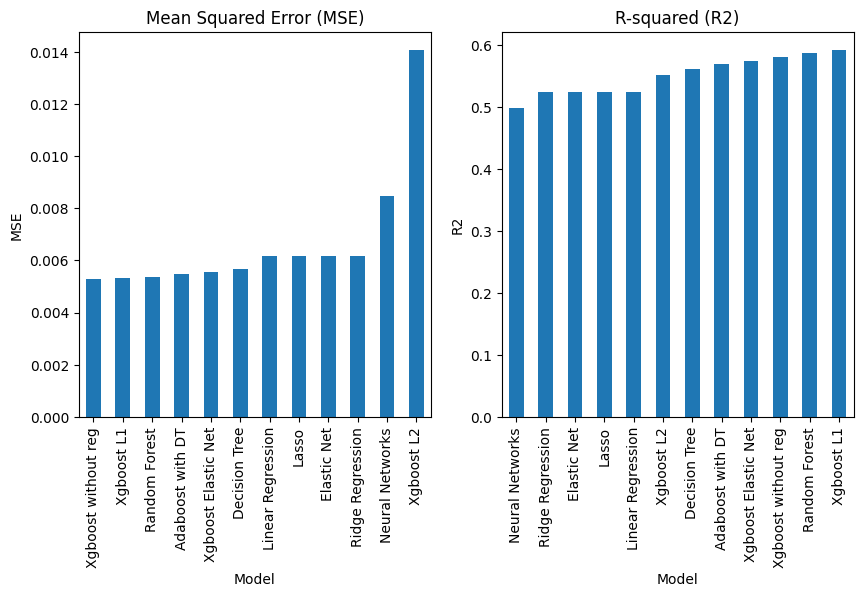

In [41]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

df_comparison['MSE'].sort_values().plot(kind='bar', ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MSE')

df_comparison['R2'].sort_values().plot(kind='bar', ax=axes[1])
axes[1].set_title('R-squared (R2)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R2')



plt.show()

Text(0, 0.5, 'MAE')

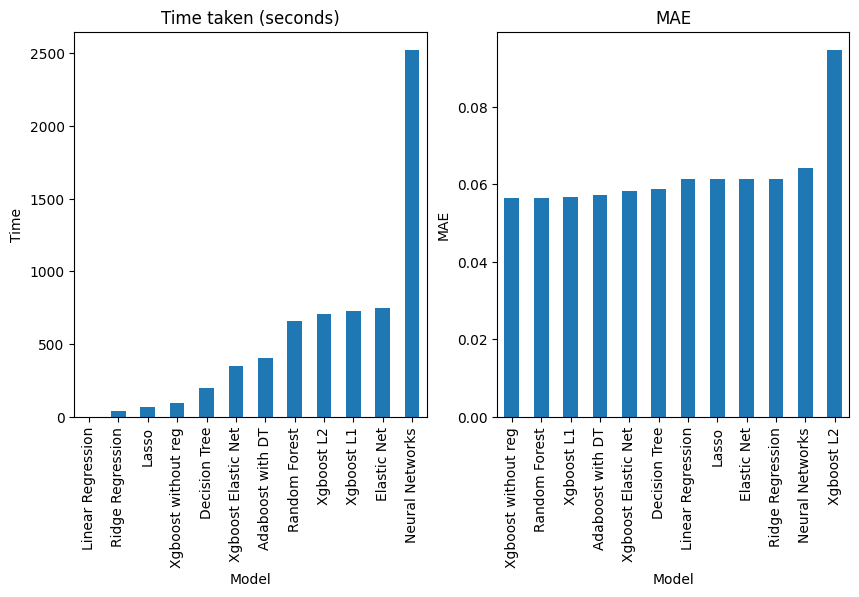

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

df_comparison['Time'].sort_values().plot(kind='bar', ax=axes[0])
axes[0].set_title('Time taken (seconds)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Time')

df_comparison['MAE'].sort_values().plot(kind='bar', ax=axes[1])
axes[1].set_title('MAE')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MAE')

In [45]:
print(df_comparison)

                          MSE        R2         Time       MAE
Linear Regression    0.006162  0.524688     0.154884  0.061474
Ridge Regression     0.006162  0.524678    39.331002  0.061476
Lasso                0.006162  0.524687    66.151113  0.061474
Elastic Net          0.006162  0.524683   745.680715  0.061475
Decision Tree        0.005687  0.561333   198.365820  0.058865
Random Forest        0.005359  0.587243   656.374912  0.056490
Adaboost with DT     0.005484  0.570447   406.871107  0.057230
Xgboost without reg  0.005280  0.581869    96.857427  0.056336
Xgboost L1           0.005327  0.591942   730.286333  0.056754
Xgboost L2           0.014054  0.551920   705.277350  0.094540
Xgboost Elastic Net  0.005550  0.574908   349.076756  0.058142
Neural Networks      0.008488  0.498976  2520.182320  0.064087


### **Metrics:**

After conducting trainig and testing of data on different models, we have gained valuable insights for the performance of different models. The metrics that we are choosing are -
1. **Mean Squared Error** : It is the average of squared difference between actual and predicted values. Lower values indicate better performance.
2. **R2 Score** : It is also known as "Coefficient Of determination". It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. Values closer to 1 indicate good predictions.
3. **Mean Absolute Error**: Here, we are calculating mean Absolute error. Lower MAE denotes better predictions.
4. **Time Taken**: I measured the time in each case. Lower values of time indicate better performance.

### **Key Observations:**

1. **LINEAR MODELS:**

- We can observe that simple linear regression, Ridge, LASSO and Elastic Net gives similar performance in terms of MSE, Accuracy and R2 score. Although, Elastic Net slightly outperforms the linear models but time taken for execution is much more due to increased complexity. 

2. **Tree Based Models:**

- We can see from the graphs that Decision Tree performs better than the linear models with a slightly lower MSE and a higher R2 score. However, its execution time is longer than Linear Regression but shorter than some ensemble methods. These metrics are for Decision tree that we considered without `ccp_alpha` i.e. without regularization. The performance of decision trees increased significantly after the pruning. The r2 score increased from 0.0.561333 to around 0.60298551 which shows a significant improvement in the performance. This is best R2 score that we got among all the models.

- Random Forest performed really well in terms of least MSE and MAE. It has the second best R2 score among all the models. But time taken for execution by this model is also the second highest. 

- Adaboost with Decision Tree shows improvement over the basic Decision Tree model with a slightly lower MSE and higher R2 score. Bu the difference between Decision Tree and Adaboost trained with tree doesn't show much difference.

3. **Gradient Boosting:**

- XGBoost without regularization has a lower MSE and higher R2 score than Adaboost with Decision Tree, indicating better performance. It also has a shorter execution time compared to many other models.
-  Xgboost without regularization and Xgboost with L1 really stand out in terms of lowest MSE and R2 Score. Based on the trade-off between time taken and performance XGBoost without regularization performs really well.
-  L1 regularization (Lasso) performs the best among the three with the lowest MSE and highest R2 score. L2 regularization (Ridge) performs worse than L1 and it even has the highest MAE and highest MSE. Even the time taken by this model is also very high

4. **Neural Networks:**

- Neural Networks have a higher MSE and lower R2 score compared to most models, indicating poorer performance in this dataset. Additionally, it has the longest execution time among all models.


### **Conclusion:**

- **Prediction Accuracy:** Ensemble methods like Random Forest and XGBoost generally outperform linear models and basic Decision Trees in terms of prediction accuracy (lower MSE, higher R2). We even found the best R2 Score with pruning for Decision trees.

- **Trade-Off:** XGBoosting with L1 regularization shows best MSE and R2 Score so trade-off between time taken and performance is worth it. Even XGBoost without regularization was performing very well and time taken by this model was less than most of the other models.

- **Low R2 Score:** One other thing that is noticeable is that for this dataset we were not able to achieve R2 Score closer to 1 but we got good MSE which indicates good performance for prediction. This might be due to the fact that the dataset might have high variability (we even noticed a lot of outliers in the boxplot), making it challenging for the model to capture the underlying patterns. As a result, even if the predictions are relatively close to the actual values on average, the model may not explain the variance well, leading to a low R2. We even noticed in correlation matrix that correlation with prices was very low for most of the features. 

- **Feature Importance:** While finding the feature importance for different models, we found that the two most important features are `room_type` and `neighbourhood`. Other than that, features that were given importance were `longitude`,`latutude` and `neighbourhood_group`. We also got `minimum_nights` and `availability_365` in some cases. Other features were given little to no importance at all. 

# **References:**


* **Dataset :** https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code?datasetId=268833&sortBy=voteCount
1. https://datascience.stackexchange.com/questions/34209/xgboost-quantifying-feature-importances/41548#41548
2. https://xgboost.readthedocs.io/en/latest/python/python_api.html
3. https://www.kaggle.com/code/mehmetisik/airbnb-nyc-eda-price-prediction-ml#16.-Rare-Analysis
4. https://www.geeksforgeeks.org/machine-learning-outlier/
5. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
6. https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=Permutation%20feature%20importance%20is%20a,on%20a%20given%20tabular%20dataset.
7. https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
8. https://www.kaggle.com/code/mehmetisik/airbnb-nyc-eda-price-prediction-ml#22.-Final-Model-Predictions-and-Comparison-with-True-Prices
9. https://en.wikipedia.org/wiki/Coefficient_of_determination



